## Bike Rental Prediction with ANN: Learning Rate = 0.01

This project aims at predicting bike rental rate based on weather and holiday information. The dataset contains hourly count of public bikes rented in Seoul Bike Sharing System, along with the corresponding weather data and holidays information, and is available at: https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

In this notebook, we train an artificial neural network with learning rate = 0.01 to make predictions

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# reading feature-engineered saved data file
df = pd.read_pickle('data_feat_eng.pkl')

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,No Holiday,Funct_Day
0,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,12,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,12,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,12,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,12,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,12,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   int64  
 8   Rainfall(mm)               8760 non-null   int64  
 9   Snowfall (cm)              8760 non-null   int64  
 10  Month                      8760 non-null   int64  
 11  Year                       8760 non-null   int64  
 12  No Holiday                 8760 non-null   uint8  
 13  Funct_Day                  8760 non-null   uint8

There are 13 numerical features

### Train-Test Splitting of Data

In [5]:
# features and labels are singled out of the dataframe

X = df.drop(['Rented Bike Count'],axis=1)
y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Data pre-processing

Pairwise correlation of features, if high, may suggest throwing away some of the features

Text(0.5, 1.0, 'Pairwise Correlation of Featues')

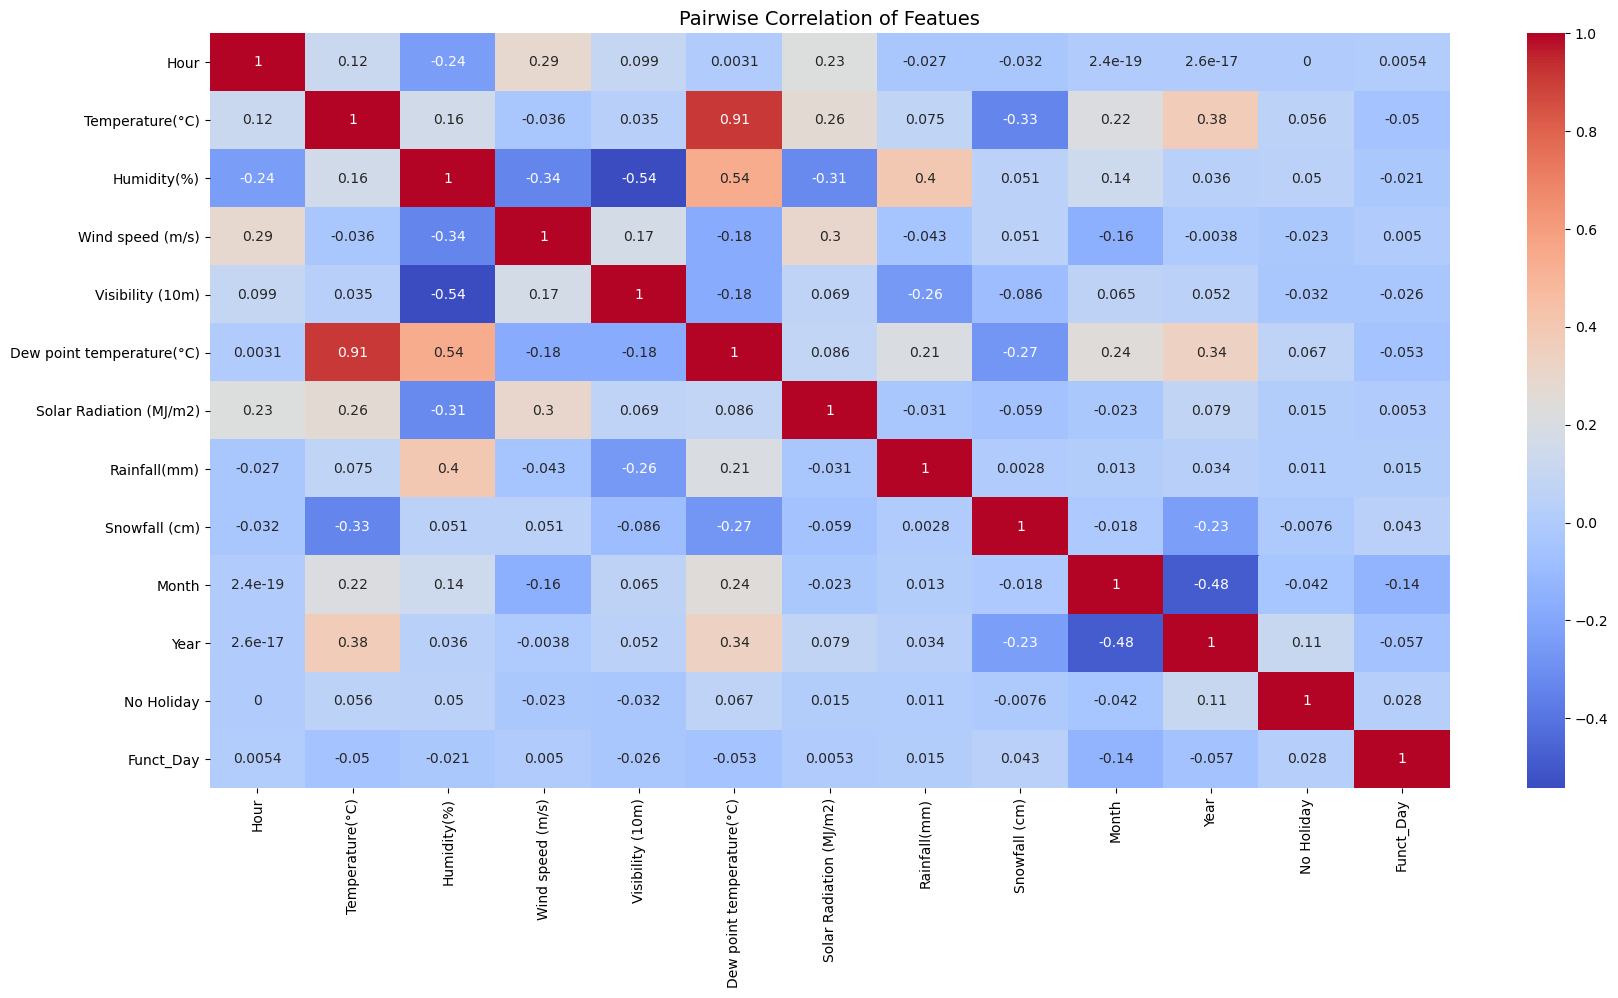

In [6]:
# pairwise correlation of featues
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)
plt.title('Pairwise Correlation of Featues', fontsize=14)

There is a single highly correlated pair. We may need to perform PCA

#### Principal Component Analysis

In [7]:
from sklearn.preprocessing import MinMaxScaler

# feature scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

To see how many principal components may be needed, let us plot cumulative explained variance

Text(0, 0.5, 'Cumulative explained variance')

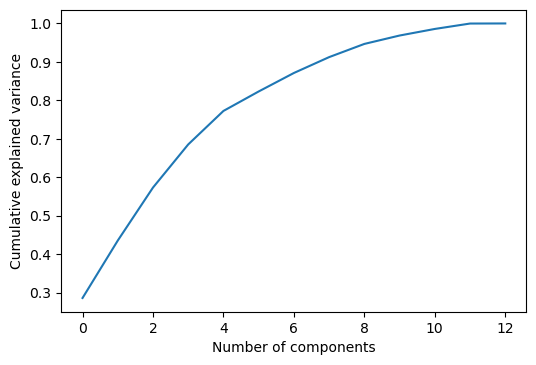

In [8]:
from sklearn.decomposition import PCA

# making the list of cumulative explained variance
pca = PCA().fit(X_train)
cumsum_list = pca.explained_variance_ratio_.cumsum()

# making the plot of cumulative explained variance
plt.figure(dpi=100)
plt.plot(cumsum_list)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We will retain as many principal components as account for 99% cumulative variance:

In [9]:
pc_model = PCA(n_components=0.99, svd_solver='full')
pc_model.fit(X_train)
pc_model.n_components_ 

12

This rids of one more feature. Now we select out the proncipal components

In [10]:
# principal component selection
X_train = pc_model.fit_transform(X_train)
X_test = pc_model.transform(X_test)

Next we create an artificial neural network for training

### Creating the Model

In [11]:
# import tensorflow and check version
import tensorflow as tf
tf.__version__

'2.4.1'

In [12]:
# imports for network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [13]:
def create_ann():
    '''This function creates an ANN model'''
    
    # start neural network
    model = Sequential()
    
    model.add(Dense(12, activation='relu')) # input layer
    
    model.add(Dense(12, activation='relu')) # first hidden layer
    
    model.add(Dense(12, activation='relu')) # second hidden layer
    
    model.add(Dense(1))                    # output layer
    
    # compile neural network
    opt = tf.keras.optimizers.Adam(learning_rate=0.01) # default learning_rate = 0.001
    model.compile(optimizer=opt,loss='mae')
    
    # return compiled network
    return model

In [14]:
# model created
ann = create_ann()

Now we will train the ANN with validation_split = 0.1, batch_size = 128, for 10_000 epochs

In [15]:
import time
t1 = time.time()

# training the model
ann.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=10_000)

t2 = time.time()

Epoch 1/10000
50/50 [==============================] - 4s 46ms/step - loss: 715.5057 - val_loss: 542.8449
Epoch 2/10000
50/50 [==============================] - 0s 2ms/step - loss: 450.7764 - val_loss: 294.7417
Epoch 3/10000
50/50 [==============================] - 0s 3ms/step - loss: 280.9910 - val_loss: 266.1926
Epoch 4/10000
50/50 [==============================] - 0s 3ms/step - loss: 271.5991 - val_loss: 261.3416
Epoch 5/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.0319 - val_loss: 256.3961
Epoch 6/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.7923 - val_loss: 252.0423
Epoch 7/10000
50/50 [==============================] - 0s 2ms/step - loss: 249.2440 - val_loss: 248.7115
Epoch 8/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.3571 - val_loss: 245.6108
Epoch 9/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.5343 - val_loss: 244.4939
Epoch 10/10000
50/50 [==============================] 

50/50 [==============================] - 0s 2ms/step - loss: 174.8998 - val_loss: 169.0645
Epoch 79/10000
50/50 [==============================] - 0s 3ms/step - loss: 174.0542 - val_loss: 171.0255
Epoch 80/10000
50/50 [==============================] - 0s 3ms/step - loss: 176.5848 - val_loss: 169.7884
Epoch 81/10000
50/50 [==============================] - 0s 2ms/step - loss: 174.6041 - val_loss: 170.1458
Epoch 82/10000
50/50 [==============================] - 0s 3ms/step - loss: 174.8927 - val_loss: 173.6344
Epoch 83/10000
50/50 [==============================] - 0s 3ms/step - loss: 173.2665 - val_loss: 170.6725
Epoch 84/10000
50/50 [==============================] - 0s 3ms/step - loss: 178.0980 - val_loss: 172.0661
Epoch 85/10000
50/50 [==============================] - 0s 3ms/step - loss: 180.3302 - val_loss: 169.7407
Epoch 86/10000
50/50 [==============================] - 0s 3ms/step - loss: 173.0564 - val_loss: 169.9892
Epoch 87/10000
50/50 [==============================] - 0s 3m

Epoch 155/10000
50/50 [==============================] - 0s 9ms/step - loss: 170.9972 - val_loss: 163.6663
Epoch 156/10000
50/50 [==============================] - 0s 7ms/step - loss: 166.6317 - val_loss: 164.8781
Epoch 157/10000
50/50 [==============================] - 0s 8ms/step - loss: 170.7600 - val_loss: 170.2981
Epoch 158/10000
50/50 [==============================] - 0s 8ms/step - loss: 177.7095 - val_loss: 164.6230
Epoch 159/10000
50/50 [==============================] - 0s 7ms/step - loss: 171.9284 - val_loss: 165.3109
Epoch 160/10000
50/50 [==============================] - 0s 6ms/step - loss: 172.5151 - val_loss: 164.9263
Epoch 161/10000
50/50 [==============================] - 0s 5ms/step - loss: 173.1896 - val_loss: 163.1083
Epoch 162/10000
50/50 [==============================] - 0s 5ms/step - loss: 172.8227 - val_loss: 164.5179
Epoch 163/10000
50/50 [==============================] - 0s 8ms/step - loss: 169.7338 - val_loss: 163.3786
Epoch 164/10000
50/50 [==============

50/50 [==============================] - 0s 4ms/step - loss: 169.9243 - val_loss: 163.0331
Epoch 232/10000
50/50 [==============================] - 0s 4ms/step - loss: 169.6126 - val_loss: 161.4503
Epoch 233/10000
50/50 [==============================] - 0s 4ms/step - loss: 170.4628 - val_loss: 163.9672
Epoch 234/10000
50/50 [==============================] - 0s 4ms/step - loss: 171.4158 - val_loss: 161.9335
Epoch 235/10000
50/50 [==============================] - 0s 4ms/step - loss: 171.0938 - val_loss: 162.1925
Epoch 236/10000
50/50 [==============================] - 0s 4ms/step - loss: 171.5853 - val_loss: 161.5388
Epoch 237/10000
50/50 [==============================] - 0s 3ms/step - loss: 168.0115 - val_loss: 160.6002
Epoch 238/10000
50/50 [==============================] - 0s 3ms/step - loss: 169.6126 - val_loss: 161.5305
Epoch 239/10000
50/50 [==============================] - 0s 3ms/step - loss: 165.5109 - val_loss: 162.0302
Epoch 240/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 167.1227 - val_loss: 162.5968
Epoch 308/10000
50/50 [==============================] - 0s 3ms/step - loss: 172.7259 - val_loss: 159.7404
Epoch 309/10000
50/50 [==============================] - 0s 3ms/step - loss: 167.1786 - val_loss: 161.2052
Epoch 310/10000
50/50 [==============================] - 0s 3ms/step - loss: 165.9205 - val_loss: 160.8545
Epoch 311/10000
50/50 [==============================] - 0s 3ms/step - loss: 166.3661 - val_loss: 160.1685
Epoch 312/10000
50/50 [==============================] - 0s 3ms/step - loss: 166.9258 - val_loss: 160.0906
Epoch 313/10000
50/50 [==============================] - 0s 3ms/step - loss: 167.9787 - val_loss: 163.0799
Epoch 314/10000
50/50 [==============================] - 0s 3ms/step - loss: 166.2183 - val_loss: 159.2819
Epoch 315/10000
50/50 [==============================] - 0s 3ms/step - loss: 165.2248 - val_loss: 159.1438
Epoch 316/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 160.2679 - val_loss: 158.4532
Epoch 384/10000
50/50 [==============================] - 0s 3ms/step - loss: 164.0424 - val_loss: 158.6664
Epoch 385/10000
50/50 [==============================] - 0s 3ms/step - loss: 166.4452 - val_loss: 157.2374
Epoch 386/10000
50/50 [==============================] - 0s 3ms/step - loss: 162.7187 - val_loss: 162.7178
Epoch 387/10000
50/50 [==============================] - 0s 3ms/step - loss: 162.4719 - val_loss: 157.9617
Epoch 388/10000
50/50 [==============================] - 0s 3ms/step - loss: 165.6545 - val_loss: 160.8912
Epoch 389/10000
50/50 [==============================] - 0s 3ms/step - loss: 163.6327 - val_loss: 157.7428
Epoch 390/10000
50/50 [==============================] - 0s 3ms/step - loss: 170.7919 - val_loss: 159.6701
Epoch 391/10000
50/50 [==============================] - 0s 3ms/step - loss: 162.0327 - val_loss: 157.1915
Epoch 392/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 165.7511 - val_loss: 157.7611
Epoch 460/10000
50/50 [==============================] - 0s 4ms/step - loss: 164.0352 - val_loss: 156.4783
Epoch 461/10000
50/50 [==============================] - 0s 4ms/step - loss: 162.0085 - val_loss: 154.7566
Epoch 462/10000
50/50 [==============================] - 0s 5ms/step - loss: 159.1849 - val_loss: 159.0779
Epoch 463/10000
50/50 [==============================] - 0s 5ms/step - loss: 162.0032 - val_loss: 155.8067
Epoch 464/10000
50/50 [==============================] - 0s 4ms/step - loss: 163.6279 - val_loss: 157.0994
Epoch 465/10000
50/50 [==============================] - 0s 5ms/step - loss: 164.0082 - val_loss: 158.8947
Epoch 466/10000
50/50 [==============================] - 0s 4ms/step - loss: 167.2364 - val_loss: 157.3208
Epoch 467/10000
50/50 [==============================] - 0s 4ms/step - loss: 163.1320 - val_loss: 159.3650
Epoch 468/10000
50/50 [==============================

50/50 [==============================] - 0s 6ms/step - loss: 165.7461 - val_loss: 157.5083
Epoch 536/10000
50/50 [==============================] - 0s 9ms/step - loss: 163.2002 - val_loss: 157.6862
Epoch 537/10000
50/50 [==============================] - 0s 7ms/step - loss: 155.3865 - val_loss: 154.5446
Epoch 538/10000
50/50 [==============================] - 0s 7ms/step - loss: 162.0005 - val_loss: 154.7922
Epoch 539/10000
50/50 [==============================] - 0s 6ms/step - loss: 160.8912 - val_loss: 154.7438
Epoch 540/10000
50/50 [==============================] - 0s 5ms/step - loss: 169.4352 - val_loss: 160.5010
Epoch 541/10000
50/50 [==============================] - 0s 4ms/step - loss: 160.7499 - val_loss: 155.8842
Epoch 542/10000
50/50 [==============================] - 0s 4ms/step - loss: 167.4577 - val_loss: 154.2061
Epoch 543/10000
50/50 [==============================] - 0s 4ms/step - loss: 161.2061 - val_loss: 156.2754
Epoch 544/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 157.2973 - val_loss: 155.1484
Epoch 612/10000
50/50 [==============================] - 0s 4ms/step - loss: 159.5420 - val_loss: 151.6170
Epoch 613/10000
50/50 [==============================] - 0s 4ms/step - loss: 159.4440 - val_loss: 153.3431
Epoch 614/10000
50/50 [==============================] - 0s 4ms/step - loss: 161.6204 - val_loss: 153.5315
Epoch 615/10000
50/50 [==============================] - 0s 4ms/step - loss: 164.6810 - val_loss: 150.9787
Epoch 616/10000
50/50 [==============================] - 0s 4ms/step - loss: 161.5417 - val_loss: 152.2186
Epoch 617/10000
50/50 [==============================] - 0s 4ms/step - loss: 163.4997 - val_loss: 154.2925
Epoch 618/10000
50/50 [==============================] - 0s 3ms/step - loss: 161.7878 - val_loss: 151.2341
Epoch 619/10000
50/50 [==============================] - 0s 3ms/step - loss: 158.9376 - val_loss: 152.2185
Epoch 620/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 164.5314 - val_loss: 169.2766
Epoch 688/10000
50/50 [==============================] - 0s 4ms/step - loss: 165.9772 - val_loss: 153.5656
Epoch 689/10000
50/50 [==============================] - 0s 4ms/step - loss: 157.9919 - val_loss: 152.8188
Epoch 690/10000
50/50 [==============================] - 0s 3ms/step - loss: 159.1421 - val_loss: 151.9485
Epoch 691/10000
50/50 [==============================] - 0s 3ms/step - loss: 161.4192 - val_loss: 153.9241
Epoch 692/10000
50/50 [==============================] - 0s 3ms/step - loss: 168.1585 - val_loss: 152.1859
Epoch 693/10000
50/50 [==============================] - 0s 3ms/step - loss: 159.0754 - val_loss: 151.7024
Epoch 694/10000
50/50 [==============================] - 0s 3ms/step - loss: 160.1355 - val_loss: 152.8768
Epoch 695/10000
50/50 [==============================] - 0s 3ms/step - loss: 160.8108 - val_loss: 156.0977
Epoch 696/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 162.1995 - val_loss: 151.0024
Epoch 764/10000
50/50 [==============================] - 0s 4ms/step - loss: 157.9548 - val_loss: 151.9753
Epoch 765/10000
50/50 [==============================] - 0s 4ms/step - loss: 162.2974 - val_loss: 151.3820
Epoch 766/10000
50/50 [==============================] - 0s 4ms/step - loss: 159.5087 - val_loss: 153.1547
Epoch 767/10000
50/50 [==============================] - 0s 3ms/step - loss: 160.9947 - val_loss: 151.3655
Epoch 768/10000
50/50 [==============================] - 0s 3ms/step - loss: 163.2153 - val_loss: 148.9529
Epoch 769/10000
50/50 [==============================] - 0s 4ms/step - loss: 155.0113 - val_loss: 157.0022
Epoch 770/10000
50/50 [==============================] - 0s 4ms/step - loss: 157.7414 - val_loss: 153.4559
Epoch 771/10000
50/50 [==============================] - 0s 3ms/step - loss: 158.8287 - val_loss: 157.3372
Epoch 772/10000
50/50 [==============================

50/50 [==============================] - 0s 5ms/step - loss: 161.9510 - val_loss: 157.0978
Epoch 840/10000
50/50 [==============================] - 0s 5ms/step - loss: 162.2220 - val_loss: 151.9354
Epoch 841/10000
50/50 [==============================] - 0s 5ms/step - loss: 157.6221 - val_loss: 150.5482
Epoch 842/10000
50/50 [==============================] - 0s 4ms/step - loss: 157.1627 - val_loss: 151.1192
Epoch 843/10000
50/50 [==============================] - 0s 4ms/step - loss: 161.4178 - val_loss: 151.2089
Epoch 844/10000
50/50 [==============================] - 0s 4ms/step - loss: 158.6401 - val_loss: 150.4737
Epoch 845/10000
50/50 [==============================] - 0s 4ms/step - loss: 164.3656 - val_loss: 151.6461
Epoch 846/10000
50/50 [==============================] - 0s 4ms/step - loss: 160.3125 - val_loss: 149.9932
Epoch 847/10000
50/50 [==============================] - 0s 4ms/step - loss: 158.6915 - val_loss: 151.8930
Epoch 848/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 159.9040 - val_loss: 150.6964
Epoch 916/10000
50/50 [==============================] - 0s 3ms/step - loss: 158.8334 - val_loss: 152.4180
Epoch 917/10000
50/50 [==============================] - 0s 4ms/step - loss: 158.5952 - val_loss: 150.4053
Epoch 918/10000
50/50 [==============================] - 0s 5ms/step - loss: 156.0580 - val_loss: 150.3094
Epoch 919/10000
50/50 [==============================] - 0s 4ms/step - loss: 160.6225 - val_loss: 151.9886
Epoch 920/10000
50/50 [==============================] - 0s 4ms/step - loss: 156.4608 - val_loss: 149.3996
Epoch 921/10000
50/50 [==============================] - 0s 4ms/step - loss: 162.3702 - val_loss: 151.6238
Epoch 922/10000
50/50 [==============================] - 0s 5ms/step - loss: 161.6576 - val_loss: 151.2144
Epoch 923/10000
50/50 [==============================] - 0s 4ms/step - loss: 160.8823 - val_loss: 152.5000
Epoch 924/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 159.3474 - val_loss: 149.6713
Epoch 992/10000
50/50 [==============================] - 0s 4ms/step - loss: 164.6657 - val_loss: 149.0972
Epoch 993/10000
50/50 [==============================] - 0s 4ms/step - loss: 158.9563 - val_loss: 152.4212
Epoch 994/10000
50/50 [==============================] - 0s 4ms/step - loss: 159.3025 - val_loss: 150.0488
Epoch 995/10000
50/50 [==============================] - 0s 4ms/step - loss: 159.3402 - val_loss: 151.7130
Epoch 996/10000
50/50 [==============================] - 0s 4ms/step - loss: 161.4505 - val_loss: 148.8320
Epoch 997/10000
50/50 [==============================] - 0s 6ms/step - loss: 157.1908 - val_loss: 154.5769
Epoch 998/10000
50/50 [==============================] - 0s 5ms/step - loss: 161.2338 - val_loss: 152.0584
Epoch 999/10000
50/50 [==============================] - 0s 4ms/step - loss: 160.6805 - val_loss: 148.6073
Epoch 1000/10000
50/50 [=============================

50/50 [==============================] - 0s 5ms/step - loss: 153.0887 - val_loss: 148.3768
Epoch 1068/10000
50/50 [==============================] - 0s 5ms/step - loss: 163.5338 - val_loss: 150.3507
Epoch 1069/10000
50/50 [==============================] - 0s 4ms/step - loss: 160.0480 - val_loss: 148.8308
Epoch 1070/10000
50/50 [==============================] - 0s 5ms/step - loss: 158.4618 - val_loss: 149.9358
Epoch 1071/10000
50/50 [==============================] - 0s 5ms/step - loss: 157.5764 - val_loss: 151.5923
Epoch 1072/10000
50/50 [==============================] - 0s 5ms/step - loss: 156.2700 - val_loss: 150.3559
Epoch 1073/10000
50/50 [==============================] - 0s 7ms/step - loss: 154.0157 - val_loss: 149.8605
Epoch 1074/10000
50/50 [==============================] - 0s 7ms/step - loss: 158.5644 - val_loss: 150.1356
Epoch 1075/10000
50/50 [==============================] - 0s 7ms/step - loss: 156.0048 - val_loss: 147.6618
Epoch 1076/10000
50/50 [=====================

Epoch 1143/10000
50/50 [==============================] - 0s 4ms/step - loss: 160.2078 - val_loss: 151.2614
Epoch 1144/10000
50/50 [==============================] - 0s 4ms/step - loss: 154.2072 - val_loss: 150.1942
Epoch 1145/10000
50/50 [==============================] - 0s 4ms/step - loss: 159.4210 - val_loss: 149.3046
Epoch 1146/10000
50/50 [==============================] - 0s 4ms/step - loss: 155.9981 - val_loss: 151.3746
Epoch 1147/10000
50/50 [==============================] - 0s 4ms/step - loss: 154.7024 - val_loss: 150.5228
Epoch 1148/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.4356 - val_loss: 148.1378
Epoch 1149/10000
50/50 [==============================] - 0s 3ms/step - loss: 157.4791 - val_loss: 149.5762
Epoch 1150/10000
50/50 [==============================] - 0s 3ms/step - loss: 154.4490 - val_loss: 149.3611
Epoch 1151/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.1598 - val_loss: 149.4311
Epoch 1152/10000
50/50 [====

Epoch 1219/10000
50/50 [==============================] - 0s 4ms/step - loss: 159.4297 - val_loss: 148.3850
Epoch 1220/10000
50/50 [==============================] - 0s 4ms/step - loss: 156.0550 - val_loss: 149.7471
Epoch 1221/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.2254 - val_loss: 148.2979
Epoch 1222/10000
50/50 [==============================] - 0s 3ms/step - loss: 157.3025 - val_loss: 147.1331
Epoch 1223/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.0106 - val_loss: 149.6494
Epoch 1224/10000
50/50 [==============================] - 0s 3ms/step - loss: 158.5160 - val_loss: 151.2672
Epoch 1225/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.5255 - val_loss: 148.8135
Epoch 1226/10000
50/50 [==============================] - 0s 3ms/step - loss: 155.5221 - val_loss: 152.4306
Epoch 1227/10000
50/50 [==============================] - 0s 3ms/step - loss: 157.5658 - val_loss: 147.3067
Epoch 1228/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 159.2172 - val_loss: 148.5806
Epoch 1295/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.0793 - val_loss: 152.4769
Epoch 1296/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.1388 - val_loss: 166.2253
Epoch 1297/10000
50/50 [==============================] - 0s 3ms/step - loss: 156.3277 - val_loss: 150.1401
Epoch 1298/10000
50/50 [==============================] - 0s 4ms/step - loss: 149.6000 - val_loss: 148.6259
Epoch 1299/10000
50/50 [==============================] - 0s 4ms/step - loss: 150.2484 - val_loss: 151.3826
Epoch 1300/10000
50/50 [==============================] - 0s 4ms/step - loss: 155.1490 - val_loss: 150.0620
Epoch 1301/10000
50/50 [==============================] - 0s 4ms/step - loss: 156.2846 - val_loss: 150.0284
Epoch 1302/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.2246 - val_loss: 151.6946
Epoch 1303/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 150.5080 - val_loss: 149.0563
Epoch 1371/10000
50/50 [==============================] - 0s 5ms/step - loss: 153.1045 - val_loss: 146.8949
Epoch 1372/10000
50/50 [==============================] - 0s 4ms/step - loss: 144.7528 - val_loss: 153.8378
Epoch 1373/10000
50/50 [==============================] - 0s 5ms/step - loss: 153.1647 - val_loss: 149.2133
Epoch 1374/10000
50/50 [==============================] - 0s 5ms/step - loss: 154.1144 - val_loss: 149.5364
Epoch 1375/10000
50/50 [==============================] - 0s 4ms/step - loss: 156.6378 - val_loss: 146.9594
Epoch 1376/10000
50/50 [==============================] - 0s 5ms/step - loss: 147.1517 - val_loss: 149.4892
Epoch 1377/10000
50/50 [==============================] - 0s 5ms/step - loss: 154.2722 - val_loss: 148.3323
Epoch 1378/10000
50/50 [==============================] - 0s 5ms/step - loss: 148.6707 - val_loss: 148.5232
Epoch 1379/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 154.8643 - val_loss: 148.7923
Epoch 1447/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.4195 - val_loss: 145.4742
Epoch 1448/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.3339 - val_loss: 149.9737
Epoch 1449/10000
50/50 [==============================] - 0s 3ms/step - loss: 150.3058 - val_loss: 148.3127
Epoch 1450/10000
50/50 [==============================] - 0s 3ms/step - loss: 146.0850 - val_loss: 149.9438
Epoch 1451/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.2501 - val_loss: 146.6641
Epoch 1452/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.2747 - val_loss: 149.1381
Epoch 1453/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.4603 - val_loss: 148.6068
Epoch 1454/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.4698 - val_loss: 146.9377
Epoch 1455/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 151.0498 - val_loss: 145.6208
Epoch 1523/10000
50/50 [==============================] - 0s 4ms/step - loss: 149.5279 - val_loss: 148.7939
Epoch 1524/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.8233 - val_loss: 148.3783
Epoch 1525/10000
50/50 [==============================] - 0s 4ms/step - loss: 150.1628 - val_loss: 150.5192
Epoch 1526/10000
50/50 [==============================] - 0s 3ms/step - loss: 151.4071 - val_loss: 152.7749
Epoch 1527/10000
50/50 [==============================] - 0s 3ms/step - loss: 152.1431 - val_loss: 153.5483
Epoch 1528/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.9495 - val_loss: 152.9489
Epoch 1529/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.3740 - val_loss: 147.2726
Epoch 1530/10000
50/50 [==============================] - 0s 3ms/step - loss: 153.6274 - val_loss: 148.4416
Epoch 1531/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 148.9083 - val_loss: 144.9858
Epoch 1599/10000
50/50 [==============================] - 0s 4ms/step - loss: 152.1271 - val_loss: 145.0620
Epoch 1600/10000
50/50 [==============================] - 0s 5ms/step - loss: 145.8250 - val_loss: 146.3239
Epoch 1601/10000
50/50 [==============================] - 0s 4ms/step - loss: 148.8454 - val_loss: 143.0282
Epoch 1602/10000
50/50 [==============================] - 0s 5ms/step - loss: 143.0620 - val_loss: 144.6906
Epoch 1603/10000
50/50 [==============================] - 0s 4ms/step - loss: 148.1883 - val_loss: 148.9215
Epoch 1604/10000
50/50 [==============================] - 0s 5ms/step - loss: 147.2982 - val_loss: 143.5735
Epoch 1605/10000
50/50 [==============================] - 0s 5ms/step - loss: 144.3193 - val_loss: 152.7772
Epoch 1606/10000
50/50 [==============================] - 0s 5ms/step - loss: 145.9697 - val_loss: 143.2278
Epoch 1607/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 143.7619 - val_loss: 144.4427
Epoch 1675/10000
50/50 [==============================] - 0s 4ms/step - loss: 146.6495 - val_loss: 143.6689
Epoch 1676/10000
50/50 [==============================] - 0s 4ms/step - loss: 147.5097 - val_loss: 145.6811
Epoch 1677/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.9598 - val_loss: 146.0021
Epoch 1678/10000
50/50 [==============================] - 0s 4ms/step - loss: 146.0877 - val_loss: 142.1781
Epoch 1679/10000
50/50 [==============================] - 0s 4ms/step - loss: 143.8641 - val_loss: 143.4881
Epoch 1680/10000
50/50 [==============================] - 0s 4ms/step - loss: 149.7441 - val_loss: 141.4464
Epoch 1681/10000
50/50 [==============================] - 0s 4ms/step - loss: 145.3135 - val_loss: 144.4309
Epoch 1682/10000
50/50 [==============================] - 0s 4ms/step - loss: 146.1354 - val_loss: 142.1112
Epoch 1683/10000
50/50 [=====================

Epoch 1750/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.5570 - val_loss: 141.7804
Epoch 1751/10000
50/50 [==============================] - 0s 3ms/step - loss: 145.0718 - val_loss: 140.3753
Epoch 1752/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.3511 - val_loss: 140.1572
Epoch 1753/10000
50/50 [==============================] - 0s 3ms/step - loss: 146.2044 - val_loss: 138.6729
Epoch 1754/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.6417 - val_loss: 140.1084
Epoch 1755/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.8934 - val_loss: 141.1089
Epoch 1756/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.1343 - val_loss: 139.0061
Epoch 1757/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.0554 - val_loss: 144.3565
Epoch 1758/10000
50/50 [==============================] - 0s 3ms/step - loss: 148.5646 - val_loss: 139.7142
Epoch 1759/10000
50/50 [====

Epoch 1826/10000
50/50 [==============================] - 0s 3ms/step - loss: 143.6773 - val_loss: 141.2023
Epoch 1827/10000
50/50 [==============================] - 0s 3ms/step - loss: 143.2440 - val_loss: 141.8711
Epoch 1828/10000
50/50 [==============================] - 0s 3ms/step - loss: 143.3785 - val_loss: 138.3952
Epoch 1829/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.1198 - val_loss: 141.1867
Epoch 1830/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.4921 - val_loss: 137.7108
Epoch 1831/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.3321 - val_loss: 140.5955
Epoch 1832/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.1308 - val_loss: 138.2045
Epoch 1833/10000
50/50 [==============================] - 0s 3ms/step - loss: 146.1398 - val_loss: 139.6679
Epoch 1834/10000
50/50 [==============================] - 0s 3ms/step - loss: 144.6266 - val_loss: 140.6730
Epoch 1835/10000
50/50 [====

Epoch 1902/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.7374 - val_loss: 137.9367
Epoch 1903/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.6638 - val_loss: 140.2531
Epoch 1904/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.5955 - val_loss: 139.6302
Epoch 1905/10000
50/50 [==============================] - 0s 4ms/step - loss: 143.9876 - val_loss: 155.0274
Epoch 1906/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.7841 - val_loss: 140.0264
Epoch 1907/10000
50/50 [==============================] - 0s 4ms/step - loss: 144.6243 - val_loss: 138.3215
Epoch 1908/10000
50/50 [==============================] - 0s 4ms/step - loss: 142.9425 - val_loss: 138.9829
Epoch 1909/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.9986 - val_loss: 142.8775
Epoch 1910/10000
50/50 [==============================] - 0s 4ms/step - loss: 150.5025 - val_loss: 138.7198
Epoch 1911/10000
50/50 [====

Epoch 1978/10000
50/50 [==============================] - 0s 4ms/step - loss: 144.0586 - val_loss: 145.9660
Epoch 1979/10000
50/50 [==============================] - 0s 4ms/step - loss: 144.1787 - val_loss: 139.9114
Epoch 1980/10000
50/50 [==============================] - 0s 4ms/step - loss: 144.3406 - val_loss: 144.4801
Epoch 1981/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.6937 - val_loss: 139.6573
Epoch 1982/10000
50/50 [==============================] - 0s 5ms/step - loss: 141.1902 - val_loss: 142.3589
Epoch 1983/10000
50/50 [==============================] - 0s 5ms/step - loss: 140.6231 - val_loss: 141.6448
Epoch 1984/10000
50/50 [==============================] - 0s 4ms/step - loss: 147.0840 - val_loss: 141.2622
Epoch 1985/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.4416 - val_loss: 146.6635
Epoch 1986/10000
50/50 [==============================] - 0s 4ms/step - loss: 144.8831 - val_loss: 141.1876
Epoch 1987/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 137.3918 - val_loss: 138.7268
Epoch 2054/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.3972 - val_loss: 139.9232
Epoch 2055/10000
50/50 [==============================] - 0s 3ms/step - loss: 143.7578 - val_loss: 139.3344
Epoch 2056/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.3162 - val_loss: 142.3917
Epoch 2057/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.5118 - val_loss: 139.5114
Epoch 2058/10000
50/50 [==============================] - 0s 3ms/step - loss: 143.4777 - val_loss: 149.2136
Epoch 2059/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.3123 - val_loss: 139.9497
Epoch 2060/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.0623 - val_loss: 146.3725
Epoch 2061/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.6275 - val_loss: 138.7811
Epoch 2062/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 138.9060 - val_loss: 137.6599
Epoch 2130/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.0174 - val_loss: 137.4787
Epoch 2131/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.7828 - val_loss: 139.5831
Epoch 2132/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.9913 - val_loss: 138.6613
Epoch 2133/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.2313 - val_loss: 139.7008
Epoch 2134/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.1170 - val_loss: 141.4450
Epoch 2135/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.0854 - val_loss: 137.4644
Epoch 2136/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.7470 - val_loss: 140.3594
Epoch 2137/10000
50/50 [==============================] - 0s 3ms/step - loss: 142.7882 - val_loss: 140.9566
Epoch 2138/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 143.0013 - val_loss: 139.3033
Epoch 2206/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.2982 - val_loss: 139.1269
Epoch 2207/10000
50/50 [==============================] - 0s 4ms/step - loss: 138.4670 - val_loss: 139.3837
Epoch 2208/10000
50/50 [==============================] - 0s 6ms/step - loss: 138.3834 - val_loss: 139.4017
Epoch 2209/10000
50/50 [==============================] - 0s 6ms/step - loss: 135.7338 - val_loss: 141.8535
Epoch 2210/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.8139 - val_loss: 137.6495
Epoch 2211/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.5013 - val_loss: 141.5867
Epoch 2212/10000
50/50 [==============================] - 0s 6ms/step - loss: 135.9139 - val_loss: 144.7712
Epoch 2213/10000
50/50 [==============================] - 0s 5ms/step - loss: 141.6851 - val_loss: 141.0965
Epoch 2214/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 139.8596 - val_loss: 138.5167
Epoch 2282/10000
50/50 [==============================] - 0s 5ms/step - loss: 138.7564 - val_loss: 139.7191
Epoch 2283/10000
50/50 [==============================] - 0s 6ms/step - loss: 137.7903 - val_loss: 143.4438
Epoch 2284/10000
50/50 [==============================] - 0s 5ms/step - loss: 136.0538 - val_loss: 140.3258
Epoch 2285/10000
50/50 [==============================] - 0s 5ms/step - loss: 136.5487 - val_loss: 141.8285
Epoch 2286/10000
50/50 [==============================] - 0s 5ms/step - loss: 136.3747 - val_loss: 141.5253
Epoch 2287/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.5471 - val_loss: 137.8988
Epoch 2288/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.6022 - val_loss: 142.5563
Epoch 2289/10000
50/50 [==============================] - 0s 4ms/step - loss: 142.1053 - val_loss: 138.4791
Epoch 2290/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 133.7868 - val_loss: 139.1946
Epoch 2358/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.9860 - val_loss: 141.0529
Epoch 2359/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.1043 - val_loss: 141.1869
Epoch 2360/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.6180 - val_loss: 139.1158
Epoch 2361/10000
50/50 [==============================] - 0s 3ms/step - loss: 141.3811 - val_loss: 143.0761
Epoch 2362/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.9609 - val_loss: 142.7266
Epoch 2363/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.5713 - val_loss: 138.6720
Epoch 2364/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.7281 - val_loss: 139.6414
Epoch 2365/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.1971 - val_loss: 139.7738
Epoch 2366/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 135.7686 - val_loss: 139.2765
Epoch 2434/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.0156 - val_loss: 139.6651
Epoch 2435/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.4606 - val_loss: 138.7183
Epoch 2436/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.1062 - val_loss: 139.6582
Epoch 2437/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.2211 - val_loss: 137.2545
Epoch 2438/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.3231 - val_loss: 138.7358
Epoch 2439/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.6800 - val_loss: 142.6423
Epoch 2440/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.8532 - val_loss: 139.1801
Epoch 2441/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.3032 - val_loss: 141.9931
Epoch 2442/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 134.5695 - val_loss: 139.3927
Epoch 2510/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.5707 - val_loss: 143.7704
Epoch 2511/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.0871 - val_loss: 139.2371
Epoch 2512/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.8295 - val_loss: 138.5137
Epoch 2513/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.3265 - val_loss: 139.5299
Epoch 2514/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.3771 - val_loss: 139.5669
Epoch 2515/10000
50/50 [==============================] - 0s 4ms/step - loss: 140.4871 - val_loss: 141.6452
Epoch 2516/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.5412 - val_loss: 141.5027
Epoch 2517/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.8486 - val_loss: 140.6275
Epoch 2518/10000
50/50 [=====================

Epoch 2585/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.6650 - val_loss: 141.8580
Epoch 2586/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.8790 - val_loss: 140.7199
Epoch 2587/10000
50/50 [==============================] - 0s 4ms/step - loss: 139.4563 - val_loss: 141.4566
Epoch 2588/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.4363 - val_loss: 141.6037
Epoch 2589/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.0512 - val_loss: 138.7020
Epoch 2590/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.2039 - val_loss: 139.7055
Epoch 2591/10000
50/50 [==============================] - 0s 5ms/step - loss: 134.6770 - val_loss: 139.2747
Epoch 2592/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.1117 - val_loss: 140.6929
Epoch 2593/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.3769 - val_loss: 140.2698
Epoch 2594/10000
50/50 [====

Epoch 2661/10000
50/50 [==============================] - 0s 3ms/step - loss: 139.3110 - val_loss: 140.9183
Epoch 2662/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.1515 - val_loss: 142.2926
Epoch 2663/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.4348 - val_loss: 138.3710
Epoch 2664/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.9496 - val_loss: 142.4158
Epoch 2665/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.2065 - val_loss: 141.9829
Epoch 2666/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.3022 - val_loss: 140.0784
Epoch 2667/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.8061 - val_loss: 139.4143
Epoch 2668/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.0124 - val_loss: 138.9226
Epoch 2669/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.5627 - val_loss: 139.0187
Epoch 2670/10000
50/50 [====

Epoch 2737/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.3670 - val_loss: 141.4615
Epoch 2738/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.9867 - val_loss: 138.4477
Epoch 2739/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.2948 - val_loss: 138.7625
Epoch 2740/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.5992 - val_loss: 141.2577
Epoch 2741/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.4365 - val_loss: 139.5029
Epoch 2742/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.8657 - val_loss: 145.0811
Epoch 2743/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.9680 - val_loss: 141.0091
Epoch 2744/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.9480 - val_loss: 144.1311
Epoch 2745/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.9305 - val_loss: 139.6891
Epoch 2746/10000
50/50 [====

Epoch 2813/10000
50/50 [==============================] - 0s 5ms/step - loss: 133.2482 - val_loss: 145.8330
Epoch 2814/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.9378 - val_loss: 140.8971
Epoch 2815/10000
50/50 [==============================] - 0s 5ms/step - loss: 134.8348 - val_loss: 138.3911
Epoch 2816/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.3130 - val_loss: 143.0477
Epoch 2817/10000
50/50 [==============================] - 0s 5ms/step - loss: 136.0690 - val_loss: 142.8568
Epoch 2818/10000
50/50 [==============================] - 0s 5ms/step - loss: 139.1635 - val_loss: 140.5825
Epoch 2819/10000
50/50 [==============================] - 0s 5ms/step - loss: 135.2848 - val_loss: 140.0569
Epoch 2820/10000
50/50 [==============================] - 0s 5ms/step - loss: 138.7420 - val_loss: 144.2787
Epoch 2821/10000
50/50 [==============================] - 0s 5ms/step - loss: 140.1799 - val_loss: 141.0664
Epoch 2822/10000
50/50 [====

Epoch 2889/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.5552 - val_loss: 141.3080
Epoch 2890/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.7185 - val_loss: 140.3492
Epoch 2891/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.3682 - val_loss: 142.5679
Epoch 2892/10000
50/50 [==============================] - 0s 5ms/step - loss: 137.0986 - val_loss: 139.7289
Epoch 2893/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.6509 - val_loss: 139.8555
Epoch 2894/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.2586 - val_loss: 141.5390
Epoch 2895/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.9478 - val_loss: 140.2215
Epoch 2896/10000
50/50 [==============================] - 0s 4ms/step - loss: 141.2789 - val_loss: 142.8589
Epoch 2897/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.0597 - val_loss: 140.1907
Epoch 2898/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 134.8060 - val_loss: 140.5412
Epoch 2965/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.5302 - val_loss: 141.5188
Epoch 2966/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.0533 - val_loss: 139.7030
Epoch 2967/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.4476 - val_loss: 139.4967
Epoch 2968/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.3027 - val_loss: 140.2450
Epoch 2969/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.7059 - val_loss: 142.9229
Epoch 2970/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.3159 - val_loss: 140.3172
Epoch 2971/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.7317 - val_loss: 139.2931
Epoch 2972/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.0772 - val_loss: 138.7342
Epoch 2973/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 135.8783 - val_loss: 138.1699
Epoch 3041/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.0871 - val_loss: 138.9309
Epoch 3042/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.9300 - val_loss: 141.9498
Epoch 3043/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.8140 - val_loss: 141.1361
Epoch 3044/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.8415 - val_loss: 141.1028
Epoch 3045/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.1939 - val_loss: 145.3734
Epoch 3046/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.0796 - val_loss: 138.5812
Epoch 3047/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.8615 - val_loss: 141.2772
Epoch 3048/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.1013 - val_loss: 139.9506
Epoch 3049/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 130.9645 - val_loss: 142.4764
Epoch 3117/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.0671 - val_loss: 145.1422
Epoch 3118/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.6134 - val_loss: 143.4561
Epoch 3119/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.6321 - val_loss: 139.8689
Epoch 3120/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.5273 - val_loss: 140.4517
Epoch 3121/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.9009 - val_loss: 141.0761
Epoch 3122/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.2251 - val_loss: 145.5152
Epoch 3123/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.5017 - val_loss: 140.8474
Epoch 3124/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.0017 - val_loss: 139.9974
Epoch 3125/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 138.0928 - val_loss: 139.8800
Epoch 3193/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.6622 - val_loss: 140.7285
Epoch 3194/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.8545 - val_loss: 141.5507
Epoch 3195/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.2421 - val_loss: 157.0072
Epoch 3196/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.1767 - val_loss: 142.7367
Epoch 3197/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.5003 - val_loss: 140.1127
Epoch 3198/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.6898 - val_loss: 143.5299
Epoch 3199/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.1441 - val_loss: 141.0602
Epoch 3200/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.0504 - val_loss: 141.6035
Epoch 3201/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 131.7531 - val_loss: 140.0940
Epoch 3269/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.7016 - val_loss: 139.9339
Epoch 3270/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.1474 - val_loss: 137.0186
Epoch 3271/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.2137 - val_loss: 145.3211
Epoch 3272/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.9975 - val_loss: 143.9319
Epoch 3273/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.3174 - val_loss: 142.2702
Epoch 3274/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.1453 - val_loss: 143.7286
Epoch 3275/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.2848 - val_loss: 138.4086
Epoch 3276/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.8896 - val_loss: 143.0977
Epoch 3277/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 135.6079 - val_loss: 143.8536
Epoch 3345/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.3096 - val_loss: 141.2150
Epoch 3346/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.7093 - val_loss: 143.3893
Epoch 3347/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.7287 - val_loss: 140.4194
Epoch 3348/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.4950 - val_loss: 143.1677
Epoch 3349/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.1895 - val_loss: 138.4799
Epoch 3350/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.1401 - val_loss: 140.7693
Epoch 3351/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.3576 - val_loss: 138.7891
Epoch 3352/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.7313 - val_loss: 148.6742
Epoch 3353/10000
50/50 [=====================

Epoch 3420/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.0775 - val_loss: 141.2855
Epoch 3421/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.8732 - val_loss: 148.0010
Epoch 3422/10000
50/50 [==============================] - 0s 5ms/step - loss: 134.8871 - val_loss: 140.9014
Epoch 3423/10000
50/50 [==============================] - 0s 5ms/step - loss: 133.0586 - val_loss: 143.7053
Epoch 3424/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.7036 - val_loss: 149.1210
Epoch 3425/10000
50/50 [==============================] - 0s 5ms/step - loss: 136.4475 - val_loss: 142.2701
Epoch 3426/10000
50/50 [==============================] - 0s 6ms/step - loss: 132.0159 - val_loss: 141.3160
Epoch 3427/10000
50/50 [==============================] - 0s 6ms/step - loss: 132.1140 - val_loss: 141.6531
Epoch 3428/10000
50/50 [==============================] - 0s 6ms/step - loss: 138.7077 - val_loss: 139.4494
Epoch 3429/10000
50/50 [====

Epoch 3496/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.9224 - val_loss: 141.3410
Epoch 3497/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.6438 - val_loss: 139.6084
Epoch 3498/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0775 - val_loss: 138.6809
Epoch 3499/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.3860 - val_loss: 139.1530
Epoch 3500/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.2651 - val_loss: 142.4583
Epoch 3501/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9354 - val_loss: 139.7747
Epoch 3502/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.7759 - val_loss: 141.0795
Epoch 3503/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.8144 - val_loss: 140.1474
Epoch 3504/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.9201 - val_loss: 140.3519
Epoch 3505/10000
50/50 [====

Epoch 3572/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.7291 - val_loss: 144.3943
Epoch 3573/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.6737 - val_loss: 139.9501
Epoch 3574/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.5141 - val_loss: 139.4477
Epoch 3575/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.6054 - val_loss: 141.7610
Epoch 3576/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.1811 - val_loss: 140.4850
Epoch 3577/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.1865 - val_loss: 140.7999
Epoch 3578/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.8672 - val_loss: 140.5860
Epoch 3579/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.4081 - val_loss: 139.7121
Epoch 3580/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.8729 - val_loss: 143.6468
Epoch 3581/10000
50/50 [====

Epoch 3648/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.2178 - val_loss: 139.8394
Epoch 3649/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.8106 - val_loss: 144.8940
Epoch 3650/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7153 - val_loss: 145.6647
Epoch 3651/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.6495 - val_loss: 139.5412
Epoch 3652/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7007 - val_loss: 141.2995
Epoch 3653/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.2012 - val_loss: 141.2603
Epoch 3654/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.1726 - val_loss: 138.4545
Epoch 3655/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.9400 - val_loss: 139.2937
Epoch 3656/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.5579 - val_loss: 141.8962
Epoch 3657/10000
50/50 [====

Epoch 3724/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.1133 - val_loss: 141.8652
Epoch 3725/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.7195 - val_loss: 142.9124
Epoch 3726/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.0191 - val_loss: 139.8616
Epoch 3727/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.4039 - val_loss: 141.8897
Epoch 3728/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.6190 - val_loss: 140.2015
Epoch 3729/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.4858 - val_loss: 143.2584
Epoch 3730/10000
50/50 [==============================] - 0s 4ms/step - loss: 137.3776 - val_loss: 139.8048
Epoch 3731/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.1331 - val_loss: 151.5887
Epoch 3732/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.8912 - val_loss: 139.0697
Epoch 3733/10000
50/50 [====

Epoch 3800/10000
50/50 [==============================] - 0s 6ms/step - loss: 132.4578 - val_loss: 148.4159
Epoch 3801/10000
50/50 [==============================] - 0s 6ms/step - loss: 137.2458 - val_loss: 140.3626
Epoch 3802/10000
50/50 [==============================] - 0s 6ms/step - loss: 132.6409 - val_loss: 145.3758
Epoch 3803/10000
50/50 [==============================] - 0s 6ms/step - loss: 131.9386 - val_loss: 150.7120
Epoch 3804/10000
50/50 [==============================] - 0s 6ms/step - loss: 133.6322 - val_loss: 144.4660
Epoch 3805/10000
50/50 [==============================] - 0s 5ms/step - loss: 137.6421 - val_loss: 146.0287
Epoch 3806/10000
50/50 [==============================] - 0s 6ms/step - loss: 129.6905 - val_loss: 143.7833
Epoch 3807/10000
50/50 [==============================] - 0s 5ms/step - loss: 133.6707 - val_loss: 139.9364
Epoch 3808/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.1429 - val_loss: 140.0357
Epoch 3809/10000
50/50 [====

Epoch 3876/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.9268 - val_loss: 141.1218
Epoch 3877/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.1866 - val_loss: 141.7659
Epoch 3878/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.2914 - val_loss: 144.8182
Epoch 3879/10000
50/50 [==============================] - 0s 3ms/step - loss: 138.2783 - val_loss: 140.3953
Epoch 3880/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.3666 - val_loss: 141.9021
Epoch 3881/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.2924 - val_loss: 141.0476
Epoch 3882/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.2577 - val_loss: 142.1818
Epoch 3883/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.1443 - val_loss: 139.7593
Epoch 3884/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9701 - val_loss: 142.2008
Epoch 3885/10000
50/50 [====

Epoch 3952/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.6773 - val_loss: 148.4096
Epoch 3953/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.6371 - val_loss: 143.4534
Epoch 3954/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.9773 - val_loss: 141.5637
Epoch 3955/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.7123 - val_loss: 142.6240
Epoch 3956/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.1987 - val_loss: 143.6404
Epoch 3957/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.1205 - val_loss: 141.7875
Epoch 3958/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.3304 - val_loss: 140.2370
Epoch 3959/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.7446 - val_loss: 142.8092
Epoch 3960/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.0742 - val_loss: 141.7364
Epoch 3961/10000
50/50 [====

Epoch 4028/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7654 - val_loss: 142.4540
Epoch 4029/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.4529 - val_loss: 140.8964
Epoch 4030/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.0238 - val_loss: 142.5843
Epoch 4031/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.1066 - val_loss: 140.1224
Epoch 4032/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.2962 - val_loss: 141.6128
Epoch 4033/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.4843 - val_loss: 146.1744
Epoch 4034/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.5039 - val_loss: 147.9794
Epoch 4035/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7632 - val_loss: 143.3805
Epoch 4036/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.7009 - val_loss: 140.7304
Epoch 4037/10000
50/50 [====

Epoch 4104/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.1700 - val_loss: 141.3127
Epoch 4105/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.3368 - val_loss: 140.9383
Epoch 4106/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.4503 - val_loss: 141.0687
Epoch 4107/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.7074 - val_loss: 145.9041
Epoch 4108/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.7205 - val_loss: 142.1135
Epoch 4109/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9200 - val_loss: 140.9088
Epoch 4110/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.5795 - val_loss: 140.4187
Epoch 4111/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.3882 - val_loss: 142.0584
Epoch 4112/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.9703 - val_loss: 143.7272
Epoch 4113/10000
50/50 [====

Epoch 4180/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.9142 - val_loss: 140.9517
Epoch 4181/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.7638 - val_loss: 144.0934
Epoch 4182/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.8296 - val_loss: 140.0035
Epoch 4183/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.9113 - val_loss: 140.8948
Epoch 4184/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.1933 - val_loss: 143.2730
Epoch 4185/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.8671 - val_loss: 142.5520
Epoch 4186/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.2191 - val_loss: 142.7271
Epoch 4187/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.2924 - val_loss: 141.1010
Epoch 4188/10000
50/50 [==============================] - ETA: 0s - loss: 131.548 - 0s 5ms/step - loss: 131.5912 - val_loss: 141.5069
Ep

50/50 [==============================] - 0s 3ms/step - loss: 127.8526 - val_loss: 141.5991
Epoch 4256/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.1552 - val_loss: 142.1026
Epoch 4257/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.0410 - val_loss: 140.4514
Epoch 4258/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.3045 - val_loss: 141.9836
Epoch 4259/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.5998 - val_loss: 140.5737
Epoch 4260/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.1168 - val_loss: 143.4748
Epoch 4261/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.0430 - val_loss: 141.6679
Epoch 4262/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.9646 - val_loss: 144.5683
Epoch 4263/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9133 - val_loss: 141.7165
Epoch 4264/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 130.4499 - val_loss: 145.8346
Epoch 4332/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.5758 - val_loss: 141.7737
Epoch 4333/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7017 - val_loss: 143.4517
Epoch 4334/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7048 - val_loss: 142.2909
Epoch 4335/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.5832 - val_loss: 143.9528
Epoch 4336/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.5958 - val_loss: 144.6783
Epoch 4337/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.9631 - val_loss: 146.4257
Epoch 4338/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.0787 - val_loss: 144.4798
Epoch 4339/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.9559 - val_loss: 141.6797
Epoch 4340/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 131.7602 - val_loss: 141.6504
Epoch 4408/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.8223 - val_loss: 143.8797
Epoch 4409/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.7731 - val_loss: 149.9026
Epoch 4410/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.3041 - val_loss: 141.5522
Epoch 4411/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.1129 - val_loss: 140.4602
Epoch 4412/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.3963 - val_loss: 140.5847
Epoch 4413/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.3306 - val_loss: 140.7676
Epoch 4414/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.0557 - val_loss: 143.1943
Epoch 4415/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.2030 - val_loss: 140.1737
Epoch 4416/10000
50/50 [=====================

50/50 [==============================] - 0s 7ms/step - loss: 133.7397 - val_loss: 145.4308
Epoch 4484/10000
50/50 [==============================] - 0s 6ms/step - loss: 132.4141 - val_loss: 141.4308
Epoch 4485/10000
50/50 [==============================] - 0s 6ms/step - loss: 134.2491 - val_loss: 139.4009
Epoch 4486/10000
50/50 [==============================] - 0s 6ms/step - loss: 130.5583 - val_loss: 142.3415
Epoch 4487/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.5772 - val_loss: 142.5533
Epoch 4488/10000
50/50 [==============================] - 0s 5ms/step - loss: 133.2957 - val_loss: 143.0083
Epoch 4489/10000
50/50 [==============================] - 0s 6ms/step - loss: 130.3389 - val_loss: 142.7960
Epoch 4490/10000
50/50 [==============================] - 0s 6ms/step - loss: 132.1577 - val_loss: 141.9762
Epoch 4491/10000
50/50 [==============================] - 0s 6ms/step - loss: 130.9102 - val_loss: 140.8136
Epoch 4492/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 130.7329 - val_loss: 142.8092
Epoch 4560/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.1609 - val_loss: 140.9208
Epoch 4561/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.6227 - val_loss: 140.3984
Epoch 4562/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.5214 - val_loss: 145.9529
Epoch 4563/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.2781 - val_loss: 141.1022
Epoch 4564/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.9119 - val_loss: 143.3676
Epoch 4565/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.6303 - val_loss: 140.4105
Epoch 4566/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.6461 - val_loss: 141.5849
Epoch 4567/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.3122 - val_loss: 143.6659
Epoch 4568/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 132.9221 - val_loss: 141.2098
Epoch 4636/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.1944 - val_loss: 141.3667
Epoch 4637/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.0882 - val_loss: 141.4775
Epoch 4638/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.7180 - val_loss: 143.2376
Epoch 4639/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.0619 - val_loss: 140.6163
Epoch 4640/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.0544 - val_loss: 138.1953
Epoch 4641/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.3592 - val_loss: 139.5535
Epoch 4642/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.4790 - val_loss: 145.4176
Epoch 4643/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.2247 - val_loss: 139.7467
Epoch 4644/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 130.8433 - val_loss: 142.7858
Epoch 4712/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.3237 - val_loss: 140.5918
Epoch 4713/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.9224 - val_loss: 140.7733
Epoch 4714/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.5446 - val_loss: 139.4521
Epoch 4715/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.3293 - val_loss: 140.7471
Epoch 4716/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.8965 - val_loss: 143.9964
Epoch 4717/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.8290 - val_loss: 142.0679
Epoch 4718/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.0575 - val_loss: 139.7798
Epoch 4719/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.3097 - val_loss: 139.7124
Epoch 4720/10000
50/50 [=====================

Epoch 4787/10000
50/50 [==============================] - 0s 7ms/step - loss: 130.3620 - val_loss: 140.1678
Epoch 4788/10000
50/50 [==============================] - 0s 7ms/step - loss: 130.9903 - val_loss: 139.6313
Epoch 4789/10000
50/50 [==============================] - 0s 8ms/step - loss: 132.9745 - val_loss: 142.1470
Epoch 4790/10000
50/50 [==============================] - 0s 9ms/step - loss: 131.1674 - val_loss: 141.0190
Epoch 4791/10000
50/50 [==============================] - 0s 10ms/step - loss: 128.6053 - val_loss: 140.0242
Epoch 4792/10000
50/50 [==============================] - 0s 8ms/step - loss: 130.0066 - val_loss: 140.1879
Epoch 4793/10000
50/50 [==============================] - 0s 6ms/step - loss: 133.3306 - val_loss: 139.7653
Epoch 4794/10000
50/50 [==============================] - 0s 6ms/step - loss: 132.5911 - val_loss: 141.7459
Epoch 4795/10000
50/50 [==============================] - 0s 6ms/step - loss: 131.5503 - val_loss: 143.6754
Epoch 4796/10000
50/50 [===

Epoch 4863/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.1468 - val_loss: 141.0538
Epoch 4864/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.7452 - val_loss: 140.7774
Epoch 4865/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.7681 - val_loss: 139.3246
Epoch 4866/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.7141 - val_loss: 152.3785
Epoch 4867/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.1844 - val_loss: 140.9039
Epoch 4868/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.7919 - val_loss: 142.2449
Epoch 4869/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.2366 - val_loss: 144.3574
Epoch 4870/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.6014 - val_loss: 140.9755
Epoch 4871/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.4442 - val_loss: 140.9912
Epoch 4872/10000
50/50 [====

Epoch 4939/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.4058 - val_loss: 142.6234
Epoch 4940/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.4823 - val_loss: 140.4647
Epoch 4941/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.2932 - val_loss: 139.7715
Epoch 4942/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.2816 - val_loss: 138.7906
Epoch 4943/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.9921 - val_loss: 138.1160
Epoch 4944/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.4719 - val_loss: 144.4946
Epoch 4945/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.9425 - val_loss: 141.2961
Epoch 4946/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.4521 - val_loss: 141.8621
Epoch 4947/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.9822 - val_loss: 140.8383
Epoch 4948/10000
50/50 [====

Epoch 5015/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.7762 - val_loss: 141.4292
Epoch 5016/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1155 - val_loss: 144.1758
Epoch 5017/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.0175 - val_loss: 141.5422
Epoch 5018/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.2756 - val_loss: 141.3794
Epoch 5019/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.5933 - val_loss: 141.9147
Epoch 5020/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.7618 - val_loss: 146.1396
Epoch 5021/10000
50/50 [==============================] - 0s 3ms/step - loss: 137.1127 - val_loss: 146.3400
Epoch 5022/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.6663 - val_loss: 139.6597
Epoch 5023/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.2734 - val_loss: 142.7482
Epoch 5024/10000
50/50 [====

Epoch 5091/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.1103 - val_loss: 140.9552
Epoch 5092/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.8862 - val_loss: 140.7117
Epoch 5093/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.1895 - val_loss: 144.6868
Epoch 5094/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9815 - val_loss: 142.0621
Epoch 5095/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.4566 - val_loss: 139.9773
Epoch 5096/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.2816 - val_loss: 140.5620
Epoch 5097/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.0453 - val_loss: 145.9648
Epoch 5098/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.7813 - val_loss: 139.2875
Epoch 5099/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.6969 - val_loss: 154.2920
Epoch 5100/10000
50/50 [====

Epoch 5167/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.0213 - val_loss: 140.6163
Epoch 5168/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.9641 - val_loss: 145.2963
Epoch 5169/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.1948 - val_loss: 140.1204
Epoch 5170/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.2093 - val_loss: 141.4450
Epoch 5171/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.5616 - val_loss: 139.7923
Epoch 5172/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.6602 - val_loss: 142.3495
Epoch 5173/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.6410 - val_loss: 141.6909
Epoch 5174/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.7962 - val_loss: 139.6414
Epoch 5175/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.2204 - val_loss: 141.4382
Epoch 5176/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 130.4407 - val_loss: 144.6096
Epoch 5243/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.1354 - val_loss: 140.0348
Epoch 5244/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.1954 - val_loss: 145.1845
Epoch 5245/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.2818 - val_loss: 142.0145
Epoch 5246/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.4601 - val_loss: 139.8243
Epoch 5247/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.8689 - val_loss: 139.2836
Epoch 5248/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.3480 - val_loss: 140.3179
Epoch 5249/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.2359 - val_loss: 141.9174
Epoch 5250/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.5878 - val_loss: 138.9398
Epoch 5251/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 131.3893 - val_loss: 140.9533
Epoch 5319/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9822 - val_loss: 148.2679
Epoch 5320/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.6229 - val_loss: 153.1072
Epoch 5321/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.6601 - val_loss: 138.7861
Epoch 5322/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.9320 - val_loss: 139.0376
Epoch 5323/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.9826 - val_loss: 139.9405
Epoch 5324/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.6191 - val_loss: 142.1888
Epoch 5325/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.9676 - val_loss: 145.2461
Epoch 5326/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.5932 - val_loss: 141.4886
Epoch 5327/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 130.6422 - val_loss: 141.7105
Epoch 5395/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.0698 - val_loss: 138.5698
Epoch 5396/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.1161 - val_loss: 141.4842
Epoch 5397/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.6628 - val_loss: 138.8441
Epoch 5398/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.1064 - val_loss: 140.1168
Epoch 5399/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.0727 - val_loss: 141.5549
Epoch 5400/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.8434 - val_loss: 139.7182
Epoch 5401/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.0177 - val_loss: 140.8745
Epoch 5402/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.3514 - val_loss: 146.7652
Epoch 5403/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 128.3736 - val_loss: 144.0484
Epoch 5471/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.3706 - val_loss: 144.7950
Epoch 5472/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.8534 - val_loss: 144.6733
Epoch 5473/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.5438 - val_loss: 139.5581
Epoch 5474/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.6042 - val_loss: 140.8907
Epoch 5475/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.3538 - val_loss: 141.3646
Epoch 5476/10000
50/50 [==============================] - 0s 4ms/step - loss: 135.3079 - val_loss: 146.4254
Epoch 5477/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.7158 - val_loss: 144.9769
Epoch 5478/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.4683 - val_loss: 144.1631
Epoch 5479/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 130.0490 - val_loss: 140.7693
Epoch 5547/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.3575 - val_loss: 141.4726
Epoch 5548/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.8781 - val_loss: 142.1951
Epoch 5549/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9168 - val_loss: 142.7458
Epoch 5550/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.6989 - val_loss: 143.0629
Epoch 5551/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.9311 - val_loss: 141.7046
Epoch 5552/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.8783 - val_loss: 141.1392
Epoch 5553/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.4988 - val_loss: 143.5996
Epoch 5554/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.9981 - val_loss: 142.0366
Epoch 5555/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 130.0546 - val_loss: 139.5571
Epoch 5623/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.0895 - val_loss: 143.7043
Epoch 5624/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.4173 - val_loss: 143.9512
Epoch 5625/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9412 - val_loss: 139.6684
Epoch 5626/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.1332 - val_loss: 141.2498
Epoch 5627/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8242 - val_loss: 140.2163
Epoch 5628/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1222 - val_loss: 138.8888
Epoch 5629/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.8956 - val_loss: 140.9575
Epoch 5630/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.5619 - val_loss: 139.4542
Epoch 5631/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 127.6805 - val_loss: 141.8313
Epoch 5699/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.5740 - val_loss: 141.6053
Epoch 5700/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0205 - val_loss: 141.9223
Epoch 5701/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.3109 - val_loss: 142.7107
Epoch 5702/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.2607 - val_loss: 142.9988
Epoch 5703/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.3516 - val_loss: 141.4330
Epoch 5704/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.4666 - val_loss: 148.5234
Epoch 5705/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.9213 - val_loss: 141.0616
Epoch 5706/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.6081 - val_loss: 141.3620
Epoch 5707/10000
50/50 [=====================

Epoch 5774/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.8760 - val_loss: 139.9866
Epoch 5775/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.3270 - val_loss: 142.2769
Epoch 5776/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.8271 - val_loss: 143.9941
Epoch 5777/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.1071 - val_loss: 142.7248
Epoch 5778/10000
50/50 [==============================] - 0s 5ms/step - loss: 134.6351 - val_loss: 140.1557
Epoch 5779/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.1570 - val_loss: 139.1235
Epoch 5780/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.5818 - val_loss: 141.1278
Epoch 5781/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.2238 - val_loss: 139.8786
Epoch 5782/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0241 - val_loss: 142.5128
Epoch 5783/10000
50/50 [====

Epoch 5850/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.8783 - val_loss: 143.3529
Epoch 5851/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.9329 - val_loss: 145.9102
Epoch 5852/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.9358 - val_loss: 140.2161
Epoch 5853/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.0271 - val_loss: 141.1498
Epoch 5854/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8340 - val_loss: 140.6950
Epoch 5855/10000
50/50 [==============================] - 0s 3ms/step - loss: 136.2307 - val_loss: 140.9617
Epoch 5856/10000
50/50 [==============================] - 0s 3ms/step - loss: 135.4456 - val_loss: 145.4535
Epoch 5857/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.4258 - val_loss: 150.3263
Epoch 5858/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.8961 - val_loss: 140.7331
Epoch 5859/10000
50/50 [====

Epoch 5926/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.4184 - val_loss: 139.0687
Epoch 5927/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.6744 - val_loss: 141.4421
Epoch 5928/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.1434 - val_loss: 142.8859
Epoch 5929/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9913 - val_loss: 140.1813
Epoch 5930/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.2718 - val_loss: 146.4391
Epoch 5931/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.0677 - val_loss: 138.0439
Epoch 5932/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.2307 - val_loss: 142.4195
Epoch 5933/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.2658 - val_loss: 140.8073
Epoch 5934/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.9294 - val_loss: 142.0458
Epoch 5935/10000
50/50 [====

Epoch 6002/10000
50/50 [==============================] - 0s 6ms/step - loss: 127.5909 - val_loss: 163.0452
Epoch 6003/10000
50/50 [==============================] - 0s 6ms/step - loss: 136.6812 - val_loss: 141.5595
Epoch 6004/10000
50/50 [==============================] - 0s 6ms/step - loss: 128.2338 - val_loss: 138.1420
Epoch 6005/10000
50/50 [==============================] - 0s 7ms/step - loss: 129.9279 - val_loss: 141.7432
Epoch 6006/10000
50/50 [==============================] - 0s 7ms/step - loss: 128.6024 - val_loss: 142.0258
Epoch 6007/10000
50/50 [==============================] - 0s 7ms/step - loss: 131.6562 - val_loss: 146.8005
Epoch 6008/10000
50/50 [==============================] - 0s 7ms/step - loss: 137.3326 - val_loss: 138.1480
Epoch 6009/10000
50/50 [==============================] - 0s 7ms/step - loss: 132.0826 - val_loss: 141.0271
Epoch 6010/10000
50/50 [==============================] - 0s 7ms/step - loss: 127.2294 - val_loss: 139.7136
Epoch 6011/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 130.3654 - val_loss: 139.4878
Epoch 6078/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.8371 - val_loss: 140.9297
Epoch 6079/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.8195 - val_loss: 137.3614
Epoch 6080/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.3596 - val_loss: 139.7198
Epoch 6081/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.1705 - val_loss: 137.9418
Epoch 6082/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.1229 - val_loss: 138.9796
Epoch 6083/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.3468 - val_loss: 138.2871
Epoch 6084/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.6315 - val_loss: 141.0603
Epoch 6085/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.7626 - val_loss: 137.3804
Epoch 6086/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 136.4150 - val_loss: 141.0591
Epoch 6154/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.1436 - val_loss: 140.4046
Epoch 6155/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.4266 - val_loss: 140.6966
Epoch 6156/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.1988 - val_loss: 142.2111
Epoch 6157/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3891 - val_loss: 138.1152
Epoch 6158/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.2938 - val_loss: 138.8266
Epoch 6159/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.2687 - val_loss: 140.6472
Epoch 6160/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.1028 - val_loss: 138.0218
Epoch 6161/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.0566 - val_loss: 147.8190
Epoch 6162/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 130.6854 - val_loss: 139.8315
Epoch 6230/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.8434 - val_loss: 138.6902
Epoch 6231/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.4324 - val_loss: 141.1597
Epoch 6232/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.6908 - val_loss: 143.9062
Epoch 6233/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.5958 - val_loss: 140.8833
Epoch 6234/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.5981 - val_loss: 141.1559
Epoch 6235/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.9459 - val_loss: 136.7183
Epoch 6236/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.1075 - val_loss: 139.4311
Epoch 6237/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.8375 - val_loss: 140.6432
Epoch 6238/10000
50/50 [=====================

Epoch 6305/10000
50/50 [==============================] - 0s 6ms/step - loss: 128.1220 - val_loss: 142.0036
Epoch 6306/10000
50/50 [==============================] - 0s 7ms/step - loss: 130.8425 - val_loss: 140.1677
Epoch 6307/10000
50/50 [==============================] - 0s 6ms/step - loss: 127.8450 - val_loss: 137.5178
Epoch 6308/10000
50/50 [==============================] - 0s 6ms/step - loss: 131.3023 - val_loss: 140.3476
Epoch 6309/10000
50/50 [==============================] - 0s 7ms/step - loss: 129.9245 - val_loss: 137.1564
Epoch 6310/10000
50/50 [==============================] - 0s 6ms/step - loss: 130.6852 - val_loss: 141.9765
Epoch 6311/10000
50/50 [==============================] - 0s 6ms/step - loss: 131.6417 - val_loss: 137.6336
Epoch 6312/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.4550 - val_loss: 136.8214
Epoch 6313/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.1877 - val_loss: 145.1091
Epoch 6314/10000
50/50 [====

Epoch 6381/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.6774 - val_loss: 137.2062
Epoch 6382/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.4499 - val_loss: 139.3730
Epoch 6383/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0645 - val_loss: 139.5822
Epoch 6384/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0111 - val_loss: 141.5133
Epoch 6385/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.1200 - val_loss: 137.6909
Epoch 6386/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.3876 - val_loss: 138.5274
Epoch 6387/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.5718 - val_loss: 137.4417
Epoch 6388/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.0824 - val_loss: 139.2861
Epoch 6389/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.0492 - val_loss: 137.6387
Epoch 6390/10000
50/50 [====

Epoch 6457/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.2200 - val_loss: 138.3340
Epoch 6458/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3776 - val_loss: 141.9713
Epoch 6459/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1892 - val_loss: 138.8763
Epoch 6460/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.7871 - val_loss: 138.9075
Epoch 6461/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.5418 - val_loss: 144.0152
Epoch 6462/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.7411 - val_loss: 137.7349
Epoch 6463/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.5675 - val_loss: 138.4845
Epoch 6464/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.4813 - val_loss: 139.4198
Epoch 6465/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.6978 - val_loss: 139.0079
Epoch 6466/10000
50/50 [====

Epoch 6533/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.6067 - val_loss: 136.6395
Epoch 6534/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7319 - val_loss: 136.0995
Epoch 6535/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9396 - val_loss: 141.4377
Epoch 6536/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.0692 - val_loss: 138.3275
Epoch 6537/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1530 - val_loss: 138.8914
Epoch 6538/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.7952 - val_loss: 140.2793
Epoch 6539/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.8403 - val_loss: 140.6444
Epoch 6540/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.8539 - val_loss: 139.1839
Epoch 6541/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.6561 - val_loss: 141.5190
Epoch 6542/10000
50/50 [====

Epoch 6609/10000
50/50 [==============================] - 0s 6ms/step - loss: 130.7080 - val_loss: 137.7165
Epoch 6610/10000
50/50 [==============================] - 0s 6ms/step - loss: 134.0622 - val_loss: 142.7214
Epoch 6611/10000
50/50 [==============================] - 0s 6ms/step - loss: 131.6943 - val_loss: 141.4007
Epoch 6612/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.6856 - val_loss: 143.1675
Epoch 6613/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.2231 - val_loss: 137.0664
Epoch 6614/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.4812 - val_loss: 140.3662
Epoch 6615/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.9301 - val_loss: 139.9178
Epoch 6616/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.2318 - val_loss: 138.9744
Epoch 6617/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.6828 - val_loss: 140.0785
Epoch 6618/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 131.8032 - val_loss: 140.1660
Epoch 6685/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.7609 - val_loss: 138.3489
Epoch 6686/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.9657 - val_loss: 138.6469
Epoch 6687/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.6490 - val_loss: 139.1448
Epoch 6688/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.6908 - val_loss: 140.6595
Epoch 6689/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.9136 - val_loss: 138.5150
Epoch 6690/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.6633 - val_loss: 137.7368
Epoch 6691/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.2895 - val_loss: 138.3911
Epoch 6692/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.4862 - val_loss: 137.9241
Epoch 6693/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 129.6377 - val_loss: 137.8552
Epoch 6761/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9086 - val_loss: 141.6318
Epoch 6762/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.2473 - val_loss: 139.0517
Epoch 6763/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.3653 - val_loss: 141.9729
Epoch 6764/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3441 - val_loss: 135.7769
Epoch 6765/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1231 - val_loss: 143.3461
Epoch 6766/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.7642 - val_loss: 137.6497
Epoch 6767/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.1113 - val_loss: 137.8943
Epoch 6768/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.3943 - val_loss: 138.6318
Epoch 6769/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 132.3504 - val_loss: 138.6777
Epoch 6837/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.2337 - val_loss: 139.9374
Epoch 6838/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.2032 - val_loss: 140.3762
Epoch 6839/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.7860 - val_loss: 137.8905
Epoch 6840/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.8684 - val_loss: 138.4079
Epoch 6841/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.3260 - val_loss: 138.0218
Epoch 6842/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.7016 - val_loss: 138.5539
Epoch 6843/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.5194 - val_loss: 138.3088
Epoch 6844/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.2825 - val_loss: 139.3517
Epoch 6845/10000
50/50 [=====================

Epoch 6912/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.4364 - val_loss: 141.1110
Epoch 6913/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.2213 - val_loss: 140.7564
Epoch 6914/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.5079 - val_loss: 139.7340
Epoch 6915/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9249 - val_loss: 138.1204
Epoch 6916/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.5466 - val_loss: 139.3036
Epoch 6917/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.8196 - val_loss: 136.2074
Epoch 6918/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.2931 - val_loss: 136.7569
Epoch 6919/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.1885 - val_loss: 138.0100
Epoch 6920/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.4301 - val_loss: 137.4137
Epoch 6921/10000
50/50 [====

Epoch 6988/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.6683 - val_loss: 135.6212
Epoch 6989/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.5964 - val_loss: 138.6709
Epoch 6990/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.3455 - val_loss: 139.8171
Epoch 6991/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.8245 - val_loss: 137.2859
Epoch 6992/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.4400 - val_loss: 135.3472
Epoch 6993/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.8006 - val_loss: 136.6271
Epoch 6994/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.1543 - val_loss: 141.3625
Epoch 6995/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.7944 - val_loss: 140.6486
Epoch 6996/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.6221 - val_loss: 139.2618
Epoch 6997/10000
50/50 [====

Epoch 7064/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.2760 - val_loss: 137.3224
Epoch 7065/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.3316 - val_loss: 138.0643
Epoch 7066/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.4052 - val_loss: 138.4692
Epoch 7067/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.1204 - val_loss: 137.5603
Epoch 7068/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.5225 - val_loss: 138.7205
Epoch 7069/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8640 - val_loss: 139.9107
Epoch 7070/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.3266 - val_loss: 138.9134
Epoch 7071/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.0558 - val_loss: 141.9092
Epoch 7072/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.3509 - val_loss: 138.7664
Epoch 7073/10000
50/50 [====

Epoch 7140/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.5514 - val_loss: 144.0178
Epoch 7141/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.9878 - val_loss: 141.8932
Epoch 7142/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.2921 - val_loss: 136.1206
Epoch 7143/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.0715 - val_loss: 143.1544
Epoch 7144/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.7301 - val_loss: 138.1870
Epoch 7145/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.2753 - val_loss: 141.4385
Epoch 7146/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.1317 - val_loss: 141.6900
Epoch 7147/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.4264 - val_loss: 139.5342
Epoch 7148/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.7401 - val_loss: 137.5988
Epoch 7149/10000
50/50 [====

Epoch 7216/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.6783 - val_loss: 137.8058
Epoch 7217/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.0670 - val_loss: 139.5306
Epoch 7218/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.6786 - val_loss: 138.3102
Epoch 7219/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9780 - val_loss: 145.3918
Epoch 7220/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.0551 - val_loss: 140.4250
Epoch 7221/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.2293 - val_loss: 136.3445
Epoch 7222/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.0417 - val_loss: 138.7840
Epoch 7223/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.2838 - val_loss: 140.8951
Epoch 7224/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.6031 - val_loss: 136.8618
Epoch 7225/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 130.2978 - val_loss: 140.7420
Epoch 7292/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.5924 - val_loss: 138.8680
Epoch 7293/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.0822 - val_loss: 140.2524
Epoch 7294/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.5620 - val_loss: 138.3284
Epoch 7295/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.8601 - val_loss: 138.4346
Epoch 7296/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.8211 - val_loss: 139.1708
Epoch 7297/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.5137 - val_loss: 137.2215
Epoch 7298/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.6131 - val_loss: 139.5122
Epoch 7299/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.3431 - val_loss: 137.7724
Epoch 7300/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 131.0033 - val_loss: 141.5589
Epoch 7368/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.3954 - val_loss: 138.6498
Epoch 7369/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.2761 - val_loss: 139.6017
Epoch 7370/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.0305 - val_loss: 137.8860
Epoch 7371/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.1478 - val_loss: 139.5652
Epoch 7372/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1479 - val_loss: 137.2119
Epoch 7373/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1943 - val_loss: 135.6173
Epoch 7374/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.3777 - val_loss: 136.8988
Epoch 7375/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.7962 - val_loss: 138.5508
Epoch 7376/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 128.9872 - val_loss: 141.4670
Epoch 7444/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.1927 - val_loss: 141.2088
Epoch 7445/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9843 - val_loss: 138.5551
Epoch 7446/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.1926 - val_loss: 138.4472
Epoch 7447/10000
50/50 [==============================] - 0s 7ms/step - loss: 125.0866 - val_loss: 136.8932
Epoch 7448/10000
50/50 [==============================] - 1s 18ms/step - loss: 129.2438 - val_loss: 136.6410
Epoch 7449/10000
50/50 [==============================] - 1s 10ms/step - loss: 132.1889 - val_loss: 138.4968
Epoch 7450/10000
50/50 [==============================] - 1s 11ms/step - loss: 131.9020 - val_loss: 135.6340
Epoch 7451/10000
50/50 [==============================] - 0s 9ms/step - loss: 128.1791 - val_loss: 141.0219
Epoch 7452/10000
50/50 [==================

50/50 [==============================] - 0s 5ms/step - loss: 129.1776 - val_loss: 140.3545
Epoch 7519/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.3723 - val_loss: 135.1286
Epoch 7520/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.6357 - val_loss: 137.9793
Epoch 7521/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.2450 - val_loss: 138.0253
Epoch 7522/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.9844 - val_loss: 137.0986
Epoch 7523/10000
50/50 [==============================] - 0s 4ms/step - loss: 134.4842 - val_loss: 139.5096
Epoch 7524/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.0315 - val_loss: 141.0000
Epoch 7525/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.9097 - val_loss: 138.8084
Epoch 7526/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.8008 - val_loss: 138.5104
Epoch 7527/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 130.5328 - val_loss: 139.3918
Epoch 7595/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2623 - val_loss: 143.8059
Epoch 7596/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.1361 - val_loss: 137.5966
Epoch 7597/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.3894 - val_loss: 142.2224
Epoch 7598/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.4850 - val_loss: 140.1380
Epoch 7599/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.8585 - val_loss: 136.7552
Epoch 7600/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.6479 - val_loss: 141.6414
Epoch 7601/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.7732 - val_loss: 137.0018
Epoch 7602/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.6377 - val_loss: 138.2387
Epoch 7603/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 131.5886 - val_loss: 139.4633
Epoch 7671/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.6592 - val_loss: 138.6279
Epoch 7672/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9407 - val_loss: 140.0783
Epoch 7673/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.8261 - val_loss: 145.7404
Epoch 7674/10000
50/50 [==============================] - 0s 4ms/step - loss: 136.0409 - val_loss: 140.2679
Epoch 7675/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.7812 - val_loss: 144.9069
Epoch 7676/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.9615 - val_loss: 138.0720
Epoch 7677/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.7602 - val_loss: 140.1111
Epoch 7678/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.0888 - val_loss: 137.4069
Epoch 7679/10000
50/50 [=====================

Epoch 7746/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.6357 - val_loss: 139.0322
Epoch 7747/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.2509 - val_loss: 139.1714
Epoch 7748/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.3145 - val_loss: 136.3805
Epoch 7749/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.3513 - val_loss: 142.8452
Epoch 7750/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.4216 - val_loss: 138.4325
Epoch 7751/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.2111 - val_loss: 137.9772
Epoch 7752/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.5928 - val_loss: 138.8369
Epoch 7753/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.7258 - val_loss: 140.6185
Epoch 7754/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.6791 - val_loss: 138.6493
Epoch 7755/10000
50/50 [====

Epoch 7822/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.9683 - val_loss: 137.7851
Epoch 7823/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.0792 - val_loss: 135.7347
Epoch 7824/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.6372 - val_loss: 143.1619
Epoch 7825/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.5456 - val_loss: 139.2856
Epoch 7826/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.5602 - val_loss: 137.4973
Epoch 7827/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1792 - val_loss: 139.6748
Epoch 7828/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.7097 - val_loss: 143.7252
Epoch 7829/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.7696 - val_loss: 139.0912
Epoch 7830/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.8347 - val_loss: 138.5630
Epoch 7831/10000
50/50 [====

Epoch 7898/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.2250 - val_loss: 137.1012
Epoch 7899/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.8056 - val_loss: 136.7591
Epoch 7900/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.3618 - val_loss: 140.5508
Epoch 7901/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.5849 - val_loss: 140.2081
Epoch 7902/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.0095 - val_loss: 137.5674
Epoch 7903/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.5813 - val_loss: 139.8963
Epoch 7904/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.3888 - val_loss: 137.4770
Epoch 7905/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.9348 - val_loss: 138.5990
Epoch 7906/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.2788 - val_loss: 137.4931
Epoch 7907/10000
50/50 [====

Epoch 7974/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.0277 - val_loss: 141.2652
Epoch 7975/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.3846 - val_loss: 146.0537
Epoch 7976/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.1331 - val_loss: 138.7554
Epoch 7977/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.2825 - val_loss: 141.2704
Epoch 7978/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.9190 - val_loss: 140.2320
Epoch 7979/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.7035 - val_loss: 140.3943
Epoch 7980/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.0776 - val_loss: 137.1866
Epoch 7981/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.0876 - val_loss: 137.2727
Epoch 7982/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.2501 - val_loss: 136.5359
Epoch 7983/10000
50/50 [====

Epoch 8050/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.8126 - val_loss: 139.0110
Epoch 8051/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.9148 - val_loss: 138.0248
Epoch 8052/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9592 - val_loss: 142.7932
Epoch 8053/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.0794 - val_loss: 137.0916
Epoch 8054/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.9027 - val_loss: 141.2479
Epoch 8055/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.7409 - val_loss: 138.3662
Epoch 8056/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.9588 - val_loss: 139.1728
Epoch 8057/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.4285 - val_loss: 138.0338
Epoch 8058/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.1047 - val_loss: 143.6439
Epoch 8059/10000
50/50 [====

Epoch 8126/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.8157 - val_loss: 140.0061
Epoch 8127/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.4867 - val_loss: 139.4168
Epoch 8128/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.0614 - val_loss: 141.7596
Epoch 8129/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.8730 - val_loss: 137.8089
Epoch 8130/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.6260 - val_loss: 137.4431
Epoch 8131/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.8797 - val_loss: 137.6679
Epoch 8132/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0163 - val_loss: 136.0870
Epoch 8133/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.3856 - val_loss: 140.6242
Epoch 8134/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.4221 - val_loss: 137.3568
Epoch 8135/10000
50/50 [====

Epoch 8202/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.8667 - val_loss: 140.3784
Epoch 8203/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.9079 - val_loss: 139.3633
Epoch 8204/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.5688 - val_loss: 138.8210
Epoch 8205/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.3793 - val_loss: 138.6035
Epoch 8206/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.2935 - val_loss: 136.7698
Epoch 8207/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.7347 - val_loss: 137.5698
Epoch 8208/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.0471 - val_loss: 138.9979
Epoch 8209/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.7691 - val_loss: 140.2742
Epoch 8210/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1655 - val_loss: 140.8535
Epoch 8211/10000
50/50 [====

Epoch 8278/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.9048 - val_loss: 138.1859
Epoch 8279/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.6550 - val_loss: 139.0270
Epoch 8280/10000
50/50 [==============================] - 0s 6ms/step - loss: 124.7236 - val_loss: 143.7855
Epoch 8281/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.3684 - val_loss: 142.5176
Epoch 8282/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.1229 - val_loss: 137.6183
Epoch 8283/10000
50/50 [==============================] - 0s 5ms/step - loss: 130.5477 - val_loss: 144.8224
Epoch 8284/10000
50/50 [==============================] - 0s 6ms/step - loss: 130.7012 - val_loss: 138.3533
Epoch 8285/10000
50/50 [==============================] - 0s 6ms/step - loss: 126.3214 - val_loss: 137.5554
Epoch 8286/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.2205 - val_loss: 136.9695
Epoch 8287/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 126.3223 - val_loss: 139.4753
Epoch 8354/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.4492 - val_loss: 140.8685
Epoch 8355/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.9614 - val_loss: 140.0599
Epoch 8356/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.5915 - val_loss: 137.7599
Epoch 8357/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.8384 - val_loss: 139.8746
Epoch 8358/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.2391 - val_loss: 140.0739
Epoch 8359/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.0503 - val_loss: 137.3535
Epoch 8360/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.9077 - val_loss: 139.4837
Epoch 8361/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.2997 - val_loss: 137.3448
Epoch 8362/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 128.4181 - val_loss: 139.7016
Epoch 8430/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.5350 - val_loss: 137.5318
Epoch 8431/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1478 - val_loss: 138.3827
Epoch 8432/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.1082 - val_loss: 140.0656
Epoch 8433/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.8859 - val_loss: 138.7758
Epoch 8434/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.9795 - val_loss: 139.1719
Epoch 8435/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.9345 - val_loss: 139.0897
Epoch 8436/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.2844 - val_loss: 137.5465
Epoch 8437/10000
50/50 [==============================] - 0s 3ms/step - loss: 124.7211 - val_loss: 140.8317
Epoch 8438/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 129.2364 - val_loss: 140.4308
Epoch 8506/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.4357 - val_loss: 137.1087
Epoch 8507/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.7153 - val_loss: 139.4669
Epoch 8508/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.0147 - val_loss: 142.6404
Epoch 8509/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3931 - val_loss: 140.3816
Epoch 8510/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.5943 - val_loss: 139.6781
Epoch 8511/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.2266 - val_loss: 137.2721
Epoch 8512/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.9298 - val_loss: 137.1521
Epoch 8513/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.6466 - val_loss: 139.7280
Epoch 8514/10000
50/50 [=====================

50/50 [==============================] - 0s 6ms/step - loss: 132.2768 - val_loss: 138.1941
Epoch 8582/10000
50/50 [==============================] - 0s 6ms/step - loss: 129.4721 - val_loss: 138.2257
Epoch 8583/10000
50/50 [==============================] - 0s 7ms/step - loss: 131.2624 - val_loss: 138.1731
Epoch 8584/10000
50/50 [==============================] - 0s 6ms/step - loss: 128.5172 - val_loss: 142.9288
Epoch 8585/10000
50/50 [==============================] - 0s 6ms/step - loss: 128.1035 - val_loss: 143.2399
Epoch 8586/10000
50/50 [==============================] - 0s 6ms/step - loss: 129.7494 - val_loss: 141.5331
Epoch 8587/10000
50/50 [==============================] - 0s 6ms/step - loss: 127.6667 - val_loss: 137.4899
Epoch 8588/10000
50/50 [==============================] - 0s 8ms/step - loss: 132.1543 - val_loss: 137.4416
Epoch 8589/10000
50/50 [==============================] - 0s 7ms/step - loss: 130.0509 - val_loss: 140.6909
Epoch 8590/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 129.8676 - val_loss: 142.0064
Epoch 8658/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.1735 - val_loss: 136.7339
Epoch 8659/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.0152 - val_loss: 136.2878
Epoch 8660/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.7571 - val_loss: 137.5392
Epoch 8661/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.9565 - val_loss: 138.6717
Epoch 8662/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.4966 - val_loss: 139.6719
Epoch 8663/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.1074 - val_loss: 138.6298
Epoch 8664/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.7307 - val_loss: 138.2057
Epoch 8665/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.9856 - val_loss: 136.7250
Epoch 8666/10000
50/50 [=====================

Epoch 8733/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.0461 - val_loss: 136.8534
Epoch 8734/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.9376 - val_loss: 139.4314
Epoch 8735/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.5006 - val_loss: 143.2366
Epoch 8736/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.3079 - val_loss: 140.0972
Epoch 8737/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2561 - val_loss: 143.1830
Epoch 8738/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.2866 - val_loss: 137.5037
Epoch 8739/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.3875 - val_loss: 136.8781
Epoch 8740/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.6373 - val_loss: 138.2414
Epoch 8741/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8172 - val_loss: 137.6164
Epoch 8742/10000
50/50 [====

Epoch 8809/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.7242 - val_loss: 141.1376
Epoch 8810/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.9138 - val_loss: 136.7865
Epoch 8811/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.5992 - val_loss: 138.4698
Epoch 8812/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.6044 - val_loss: 137.1816
Epoch 8813/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.9616 - val_loss: 139.2876
Epoch 8814/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.5821 - val_loss: 137.9025
Epoch 8815/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.4774 - val_loss: 139.3199
Epoch 8816/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.9419 - val_loss: 140.1776
Epoch 8817/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.0631 - val_loss: 136.8854
Epoch 8818/10000
50/50 [====

Epoch 8885/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.2004 - val_loss: 139.1542
Epoch 8886/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.2712 - val_loss: 144.0022
Epoch 8887/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.9592 - val_loss: 138.8856
Epoch 8888/10000
50/50 [==============================] - 0s 5ms/step - loss: 127.1640 - val_loss: 139.4012
Epoch 8889/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.9951 - val_loss: 139.2408
Epoch 8890/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.2226 - val_loss: 137.8469
Epoch 8891/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.2927 - val_loss: 135.8472
Epoch 8892/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.7771 - val_loss: 139.1090
Epoch 8893/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.1747 - val_loss: 138.5273
Epoch 8894/10000
50/50 [====

Epoch 8961/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.2040 - val_loss: 138.9755
Epoch 8962/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.1162 - val_loss: 142.2797
Epoch 8963/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.6156 - val_loss: 137.3947
Epoch 8964/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.0977 - val_loss: 137.4423
Epoch 8965/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.6062 - val_loss: 137.1463
Epoch 8966/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.5630 - val_loss: 134.4917
Epoch 8967/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.6132 - val_loss: 140.3539
Epoch 8968/10000
50/50 [==============================] - 0s 3ms/step - loss: 132.8673 - val_loss: 138.6698
Epoch 8969/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.5047 - val_loss: 135.7695
Epoch 8970/10000
50/50 [====

Epoch 9037/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.7256 - val_loss: 137.7339
Epoch 9038/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.4405 - val_loss: 136.5196
Epoch 9039/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.6629 - val_loss: 138.8115
Epoch 9040/10000
50/50 [==============================] - 0s 3ms/step - loss: 134.1742 - val_loss: 137.9979
Epoch 9041/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.5665 - val_loss: 139.7443
Epoch 9042/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.1916 - val_loss: 141.5877
Epoch 9043/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.7142 - val_loss: 139.8331
Epoch 9044/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3455 - val_loss: 138.4239
Epoch 9045/10000
50/50 [==============================] - 0s 3ms/step - loss: 129.0662 - val_loss: 136.4178
Epoch 9046/10000
50/50 [====

Epoch 9113/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.5854 - val_loss: 144.2899
Epoch 9114/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.3691 - val_loss: 145.8739
Epoch 9115/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.2096 - val_loss: 136.9141
Epoch 9116/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.5129 - val_loss: 136.9103
Epoch 9117/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.2240 - val_loss: 139.5343
Epoch 9118/10000
50/50 [==============================] - 0s 4ms/step - loss: 133.7084 - val_loss: 135.8050
Epoch 9119/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.5996 - val_loss: 139.4905
Epoch 9120/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.7352 - val_loss: 139.2690
Epoch 9121/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.6914 - val_loss: 137.0040
Epoch 9122/10000
50/50 [====

Epoch 9189/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.1927 - val_loss: 137.1303
Epoch 9190/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.4198 - val_loss: 137.9931
Epoch 9191/10000
50/50 [==============================] - 0s 5ms/step - loss: 132.3918 - val_loss: 139.4151
Epoch 9192/10000
50/50 [==============================] - 0s 5ms/step - loss: 131.0693 - val_loss: 136.9710
Epoch 9193/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.5268 - val_loss: 139.3750
Epoch 9194/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.1669 - val_loss: 136.2519
Epoch 9195/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.4816 - val_loss: 137.5317
Epoch 9196/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.9206 - val_loss: 137.4345
Epoch 9197/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.1638 - val_loss: 138.7672
Epoch 9198/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 130.1462 - val_loss: 137.2176
Epoch 9265/10000
50/50 [==============================] - 0s 4ms/step - loss: 130.0645 - val_loss: 140.3326
Epoch 9266/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.2489 - val_loss: 138.5371
Epoch 9267/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.9035 - val_loss: 139.4431
Epoch 9268/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.4450 - val_loss: 137.2680
Epoch 9269/10000
50/50 [==============================] - 0s 3ms/step - loss: 121.6575 - val_loss: 139.2233
Epoch 9270/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.5500 - val_loss: 139.6748
Epoch 9271/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.6227 - val_loss: 137.7327
Epoch 9272/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.9231 - val_loss: 135.7510
Epoch 9273/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 129.5084 - val_loss: 140.3175
Epoch 9341/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.5338 - val_loss: 139.3637
Epoch 9342/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.6061 - val_loss: 137.1958
Epoch 9343/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.8496 - val_loss: 139.3274
Epoch 9344/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.0412 - val_loss: 139.8169
Epoch 9345/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.0967 - val_loss: 138.7577
Epoch 9346/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.7342 - val_loss: 141.7983
Epoch 9347/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.4214 - val_loss: 138.4734
Epoch 9348/10000
50/50 [==============================] - 0s 3ms/step - loss: 123.6570 - val_loss: 137.8535
Epoch 9349/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 129.9369 - val_loss: 138.7124
Epoch 9417/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.0023 - val_loss: 136.4784
Epoch 9418/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.7081 - val_loss: 137.4592
Epoch 9419/10000
50/50 [==============================] - 0s 4ms/step - loss: 124.8067 - val_loss: 137.3735
Epoch 9420/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.0552 - val_loss: 139.0585
Epoch 9421/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.5196 - val_loss: 137.5802
Epoch 9422/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.0440 - val_loss: 137.1948
Epoch 9423/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.5242 - val_loss: 137.1142
Epoch 9424/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.7776 - val_loss: 137.1475
Epoch 9425/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 130.1723 - val_loss: 139.3881
Epoch 9493/10000
50/50 [==============================] - 0s 5ms/step - loss: 125.2305 - val_loss: 138.7299
Epoch 9494/10000
50/50 [==============================] - 0s 5ms/step - loss: 129.2413 - val_loss: 140.7384
Epoch 9495/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.0302 - val_loss: 138.3403
Epoch 9496/10000
50/50 [==============================] - 0s 5ms/step - loss: 124.7636 - val_loss: 142.2518
Epoch 9497/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.1626 - val_loss: 137.1159
Epoch 9498/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.6141 - val_loss: 141.9976
Epoch 9499/10000
50/50 [==============================] - 0s 5ms/step - loss: 128.7715 - val_loss: 138.8458
Epoch 9500/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.7002 - val_loss: 137.5583
Epoch 9501/10000
50/50 [=====================

Epoch 9568/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.1628 - val_loss: 139.1493
Epoch 9569/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.9468 - val_loss: 138.1115
Epoch 9570/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.2767 - val_loss: 138.6482
Epoch 9571/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.3398 - val_loss: 142.0861
Epoch 9572/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.0522 - val_loss: 138.2464
Epoch 9573/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.4795 - val_loss: 138.3575
Epoch 9574/10000
50/50 [==============================] - 0s 3ms/step - loss: 131.6594 - val_loss: 137.7666
Epoch 9575/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.5848 - val_loss: 140.6191
Epoch 9576/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.9157 - val_loss: 137.3531
Epoch 9577/10000
50/50 [====

Epoch 9644/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.5830 - val_loss: 136.4956
Epoch 9645/10000
50/50 [==============================] - 0s 3ms/step - loss: 127.5974 - val_loss: 137.6615
Epoch 9646/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2970 - val_loss: 137.0041
Epoch 9647/10000
50/50 [==============================] - 0s 3ms/step - loss: 128.3867 - val_loss: 138.9071
Epoch 9648/10000
50/50 [==============================] - 0s 3ms/step - loss: 125.2285 - val_loss: 137.8384
Epoch 9649/10000
50/50 [==============================] - 0s 3ms/step - loss: 126.6127 - val_loss: 138.8090
Epoch 9650/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.7195 - val_loss: 138.9625
Epoch 9651/10000
50/50 [==============================] - 0s 3ms/step - loss: 130.7426 - val_loss: 136.2281
Epoch 9652/10000
50/50 [==============================] - 0s 3ms/step - loss: 133.2866 - val_loss: 137.8867
Epoch 9653/10000
50/50 [====

Epoch 9720/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.8096 - val_loss: 136.6988
Epoch 9721/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.1386 - val_loss: 138.2616
Epoch 9722/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.7158 - val_loss: 140.4308
Epoch 9723/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.6807 - val_loss: 139.7764
Epoch 9724/10000
50/50 [==============================] - 0s 5ms/step - loss: 126.6332 - val_loss: 138.3291
Epoch 9725/10000
50/50 [==============================] - 0s 4ms/step - loss: 128.6345 - val_loss: 140.8794
Epoch 9726/10000
50/50 [==============================] - 0s 4ms/step - loss: 126.4693 - val_loss: 138.6768
Epoch 9727/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.8387 - val_loss: 142.0868
Epoch 9728/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.0033 - val_loss: 138.3045
Epoch 9729/10000
50/50 [====

Epoch 9796/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.8485 - val_loss: 139.7877
Epoch 9797/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.9057 - val_loss: 138.4971
Epoch 9798/10000
50/50 [==============================] - 0s 4ms/step - loss: 131.0054 - val_loss: 139.6751
Epoch 9799/10000
50/50 [==============================] - 0s 4ms/step - loss: 125.8931 - val_loss: 138.8174
Epoch 9800/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.1513 - val_loss: 137.2640
Epoch 9801/10000
50/50 [==============================] - 0s 4ms/step - loss: 127.8634 - val_loss: 137.6249
Epoch 9802/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.2381 - val_loss: 139.4639
Epoch 9803/10000
50/50 [==============================] - 0s 4ms/step - loss: 132.0931 - val_loss: 137.9242
Epoch 9804/10000
50/50 [==============================] - 0s 4ms/step - loss: 129.4920 - val_loss: 137.9307
Epoch 9805/10000
50/50 [====

Epoch 9872/10000
50/50 [==============================] - 0s 2ms/step - loss: 130.7857 - val_loss: 141.2513
Epoch 9873/10000
50/50 [==============================] - 0s 2ms/step - loss: 129.4117 - val_loss: 139.4976
Epoch 9874/10000
50/50 [==============================] - 0s 2ms/step - loss: 130.0370 - val_loss: 140.0662
Epoch 9875/10000
50/50 [==============================] - 0s 2ms/step - loss: 125.9710 - val_loss: 144.8174
Epoch 9876/10000
50/50 [==============================] - 0s 2ms/step - loss: 131.1140 - val_loss: 138.0601
Epoch 9877/10000
50/50 [==============================] - 0s 2ms/step - loss: 128.9361 - val_loss: 137.3042
Epoch 9878/10000
50/50 [==============================] - 0s 2ms/step - loss: 127.3860 - val_loss: 137.9530
Epoch 9879/10000
50/50 [==============================] - 0s 2ms/step - loss: 124.6844 - val_loss: 137.9335
Epoch 9880/10000
50/50 [==============================] - 0s 2ms/step - loss: 127.6582 - val_loss: 140.7939
Epoch 9881/10000
50/50 [====

Epoch 9948/10000
50/50 [==============================] - 0s 2ms/step - loss: 126.9454 - val_loss: 144.3021
Epoch 9949/10000
50/50 [==============================] - 0s 2ms/step - loss: 129.4456 - val_loss: 139.3474
Epoch 9950/10000
50/50 [==============================] - 0s 2ms/step - loss: 128.5758 - val_loss: 141.7308
Epoch 9951/10000
50/50 [==============================] - 0s 2ms/step - loss: 130.2678 - val_loss: 141.6545
Epoch 9952/10000
50/50 [==============================] - 0s 2ms/step - loss: 127.3198 - val_loss: 140.0578
Epoch 9953/10000
50/50 [==============================] - 0s 2ms/step - loss: 124.2366 - val_loss: 138.9974
Epoch 9954/10000
50/50 [==============================] - 0s 2ms/step - loss: 129.0466 - val_loss: 140.9959
Epoch 9955/10000
50/50 [==============================] - 0s 2ms/step - loss: 125.6099 - val_loss: 140.1846
Epoch 9956/10000
50/50 [==============================] - 0s 2ms/step - loss: 132.2211 - val_loss: 136.6330
Epoch 9957/10000
50/50 [====

In [16]:
# measure training time
print('Time taken in validated training: {:.1f} sec'.format(t2-t1))

Time taken in validated training: 1967.5 sec


Now we enlist 'loss' and 'val_loss', and plot them against epoch number 

In [17]:
losses = pd.DataFrame(ann.history.history) # losses in the training history
epoch = losses.index.values+np.ones_like(losses.index.values) # epoch number
loss = losses['loss'].values # training loss
val_loss = losses['val_loss'].values # validation loss

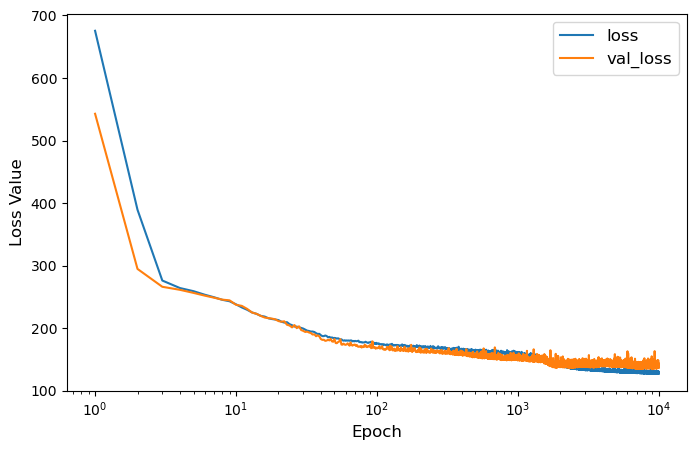

In [18]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,5),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Loss Value',fontsize=12)
plt.legend(loc=1,fontsize=12)

Learning rate looks perfect; this should be our best model for given 10_000 training epoch

### Evaluation on Test Data

In [19]:
# predicted bike rental rate
y_pred = ann.predict(X_test)

Text(0, 0.5, 'Predicted value')

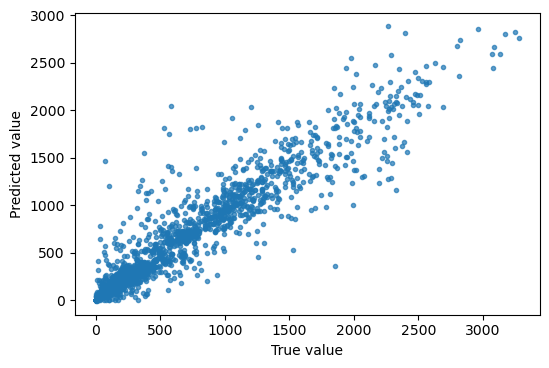

In [20]:
# plot of true rental rate against predicted value 
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test.values,y_pred,'o',markersize=3,alpha=0.7)
plt.xlabel('True value')
plt.ylabel('Predicted value')

Text(0, 0.5, 'Probability Distribution')

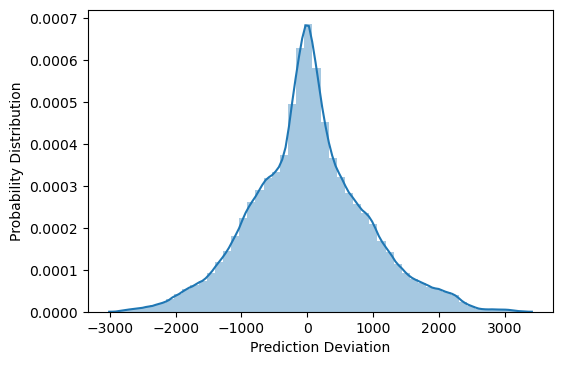

In [21]:
# distribution plot of prediction devations
plt.figure(figsize=(6,4),dpi=100)
sns.distplot(y_test.values-y_pred)
plt.xlabel('Prediction Deviation')
plt.ylabel('Probability Distribution')

Now we compute some performance metric in predicting the test values

In [22]:
from sklearn.metrics import explained_variance_score, r2_score

metric = {'value':[]}

# explained variance
exp_var = round(explained_variance_score(y_test,y_pred),3)
metric['value'].append(exp_var)

# R^2_score
r2 = round(r2_score(y_test,y_pred),3)
metric['value'].append(r2)

df_metric = pd.DataFrame(index=['explained_variance','R_squared'],
                         data=metric,
                         columns=['value'])

In [23]:
df_metric

,value
explained_variance,0.872
R_squared,0.871


Metric values are the best among all